# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os


In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)
print(os.listdir())

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.4
seaborn version: 0.13.2
['.ipynb_checkpoints', 'EDA_Assg_NYC_Taxi_Starter.ipynb', 'yellow_tripdata_2023-01.parquet', 'yellow_tripdata_2023-02.parquet', 'yellow_tripdata_2023-03.parquet', 'yellow_tripdata_2023-04.parquet', 'yellow_tripdata_2023-05.parquet', 'yellow_tripdata_2023-06.parquet', 'yellow_tripdata_2023-07.parquet', 'yellow_tripdata_2023-08.parquet', 'yellow_tripdata_2023-09.parquet', 'yellow_tripdata_2023-10.parquet', 'yellow_tripdata_2023-11.parquet', 'yellow_tripdata_2023-12.parquet']


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file
#df = pd.read_parquet('yellow_tripdata_2023-12.parquet')


df = pd.read_parquet(r'C:\Users\saivi\Downloads\EDA-NYC-Taxi (1)\Starter Notebook - EDA NYC Taxi\yellow_tripdata_2023-12.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376567 entries, 0 to 3376566
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-12-01 00:06:06   2023-12-01 00:15:47              0.0   
1         1  2023-12-01 00:22:26   2023-12-01 00:28:53              0.0   
2         1  2023-12-01 00:59:44   2023-12-01 01:13:22              2.0   
3         2  2023-12-01 00:22:17   2023-12-01 00:30:59              1.0   
4         2  2023-12-01 00:18:16   2023-12-01 00:25:32              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.10         1.0                  N           230            48   
1           1.50         1.0                  N           142           238   
2           2.20         1.0                  N           114           186   
3           0.66         1.0                  N            79            79   
4           2.20         1.0                  N           229           263   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         10.0    3.5      0.5        1.50           0.0   
1             1          9.3    3.5      0.5        2.85           0.0   
2             1         13.5    3.5      0.5        3.00           0.0   
3             2          7.2    1.0      0.5        0.00           0.0   
4             1         11.4    1.0      0.5        2.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         16.50                   2.5          0.0  
1                    1.0         17.15                   2.5          0.0  
2                    1.0         21.50                   2.5          0.0  
3                    1.0         12.20                   2.5          0.0  
4                    1.0         18.40                   2.5          0.0

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\saivi\Downloads\EDA-NYC-Taxi (1)\Starter Notebook - EDA NYC Taxi')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(file_path)
        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        #Extracting the data
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['date'].unique():
            daily_data=monthly_data[monthly_data['date'] == date].copy()
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data=daily_data[monthly_data['hour'] == hour]
                # Sample 5% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac = 0.05, random_state = 42)
                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])  

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Reset index after combining all months
df.reset_index(drop=True, inplace=True)

# Show summary of sampled dataset
print(df.head())

C:\Users\saivi\Downloads\EDA-NYC-Taxi (1)\Starter Notebook - EDA NYC Taxi\.ipynb_checkpoints
Error reading file .ipynb_checkpoints: Error creating dataset. Could not read schema from 'C:/Users/saivi/Downloads/EDA-NYC-Taxi (1)/Starter Notebook - EDA NYC Taxi/.ipynb_checkpoints/EDA_Assg_NYC_Taxi_Starter-checkpoint.ipynb'. Is this a 'parquet' file?: Could not open Parquet input source 'C:/Users/saivi/Downloads/EDA-NYC-Taxi (1)/Starter Notebook - EDA NYC Taxi/.ipynb_checkpoints/EDA_Assg_NYC_Taxi_Starter-checkpoint.ipynb': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
C:\Users\saivi\Downloads\EDA-NYC-Taxi (1)\Starter Notebook - EDA NYC Taxi\EDA_Assg_NYC_Taxi_Starter.ipynb
Error reading file EDA_Assg_NYC_Taxi_Starter.ipynb: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
C:\Users\saivi\Downloads\EDA-NYC-Taxi (1)\Starter Notebook - EDA NYC

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [19]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet(r'C:\Users\saivi\Downloads\EDA-NYC-Taxi (1)\Starter Notebook - EDA NYC Taxi.parquet',index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [21]:
# Load the new data file

df.to_parquet(r'C:\Users\saivi\Downloads\EDA-NYC-Taxi (1)\Starter Notebook - EDA NYC Taxi.parquet',index=False)

In [25]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:10:30   2023-01-01 00:11:49              1.0   
1         2  2023-01-01 00:49:02   2023-01-01 00:55:15              1.0   
2         1  2023-01-01 00:47:17   2023-01-01 01:07:01              2.0   
3         2  2023-01-01 00:06:02   2023-01-01 00:31:38              1.0   
4         2  2023-01-01 00:02:19   2023-01-01 00:30:49              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.49         1.0                  N           239           238   
1           0.75         1.0                  N            45           148   
2           2.90         1.0                  N           142           170   
3           2.50         1.0                  N            43           161   
4          20.37         2.0                  N           132           140   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        1.88          0.00   
1             2  ...      0.5        0.00          0.00   
2             1  ...      0.5        4.80          0.00   
3             1  ...      0.5        7.25          0.00   
4             1  ...      0.5       12.00          6.55   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         11.28                   2.5          0.0   
1                    1.0         12.90                   2.5          0.0   
2                    1.0         28.90                   2.5          0.0   
3                    1.0         36.25                   2.5          0.0   
4                    1.0         92.55                   2.5          0.0   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [27]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915511 entries, 0 to 1915510
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [31]:
# Fix the index and drop any columns that are not needed

df = df.reset_index(drop=True)
#Drop any columns
#column store_and_fwd_flag can be dropped
df = df.drop(columns=['store_and_fwd_flag'], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915511 entries, 0 to 1915510
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  date                  

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [33]:
# Combine the two airport fee columns

df["Airport_fee"] = df["airport_fee"].fillna(0) + df["Airport_fee"].fillna(0)  # Merge values into one single column Airport_fee
df.drop(columns=["airport_fee"], inplace=True)  # Drop the extra column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915511 entries, 0 to 1915510
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                  

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [35]:
# check where values of fare amount are negative

df[df["fare_amount"] < 0.0] 

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
51              2  2023-01-01 00:31:44   2023-01-01 00:51:27              2.0   
138             2  2023-01-01 00:11:23   2023-01-01 00:24:21              1.0   
170             2  2023-01-01 00:40:02   2023-01-01 01:07:56              1.0   
174             2  2023-01-01 00:33:21   2023-01-01 00:47:59              3.0   
218             2  2023-01-01 00:40:34   2023-01-01 01:01:20              1.0   
...           ...                  ...                   ...              ...   
1915325         2  2023-12-31 23:00:11   2023-12-31 23:14:14              NaN   
1915354         2  2023-12-31 23:21:30   2023-12-31 23:31:08              1.0   
1915426         2  2023-12-31 23:11:37   2023-12-31 23:33:26              2.0   
1915446         2  2023-12-31 23:26:05   2023-12-31 23:27:56              1.0   
1915508         2  2023-12-31 23:40:07   2023-12-31 23:41:11              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
51                5.21         1.0           186           144             4   
138               2.14         1.0           137           144             4   
170               9.90         1.0            90            67             4   
174               8.17         4.0           132           265             4   
218               3.86         1.0            50           162             4   
...                ...         ...           ...           ...           ...   
1915325           1.78         NaN           238           143             0   
1915354           0.76         1.0            68           186             4   
1915426           8.51         1.0           138            28             4   
1915446           0.57         1.0           263           141             4   
1915508           0.12         1.0           211           211             4   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
51             -26.1   -1.0     -0.5         0.0          0.00   
138            -14.2   -1.0     -0.5         0.0          0.00   
170            -43.6   -1.0     -0.5         0.0         -6.55   
174            -39.4   -1.0     -0.5         0.0          0.00   
218            -21.9   -1.0     -0.5         0.0          0.00   
...              ...    ...      ...         ...           ...   
1915325         -1.0    0.0      0.5         0.0          0.00   
1915354        -10.0   -1.0     -0.5         0.0          0.00   
1915426        -38.0   -6.0     -0.5         0.0          0.00   
1915446         -4.4   -1.0     -0.5         0.0          0.00   
1915508         -3.7   -1.0     -0.5         0.0          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
51                        -1.0        -31.10                  -2.5   
138                       -1.0        -19.20                  -2.5   
170                       -1.0        -55.15                  -2.5   
174                       -1.0        -43.15                   0.0   
218                       -1.0        -26.90                  -2.5   
...                        ...           ...                   ...   
1915325                    1.0          3.00                   NaN   
1915354                   -1.0        -15.00                  -2.5   
1915426                   -1.0        -47.25                   0.0   
1915446                   -1.0         -9.40                  -2.5   
1915508                   -1.0         -8.70                  -2.5   

               date  hour  Airport_fee  
51       2023-01-01     0         0.00  
138      2023-01-01     0         0.00  
170      2023-01-01     0         0.00  
174      2023-01-01     0        -1.25  
218      2023-01-01     0         0.00  
...             ...   ...          ...  
1915325  2023-12-31    23         0.00  
1915354  2023-12-31    23         0.00  
1915426  2023-12-31    23        -1.75  
1915446  2023-12-31    23      

Did you notice something different in the `RatecodeID` column for above records?

In [37]:
# Analyse RatecodeID for the negative fare amounts

df[df["fare_amount"] < 0.0]["RatecodeID"].value_counts()

RatecodeID
1.0    16721
2.0     1324
5.0      369
3.0      223
4.0       88
Name: count, dtype: int64

In [39]:
# Find which columns have negative values
negative_columns = df.select_dtypes(include=['number']).columns[(df.select_dtypes(include=['number']) < 0).any()]
print(negative_columns)


Index(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')


In [41]:
# fix these negative values

df[df["extra"] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
51              2  2023-01-01 00:31:44   2023-01-01 00:51:27              2.0   
138             2  2023-01-01 00:11:23   2023-01-01 00:24:21              1.0   
170             2  2023-01-01 00:40:02   2023-01-01 01:07:56              1.0   
174             2  2023-01-01 00:33:21   2023-01-01 00:47:59              3.0   
218             2  2023-01-01 00:40:34   2023-01-01 01:01:20              1.0   
...           ...                  ...                   ...              ...   
1915310         2  2023-12-31 22:57:26   2023-12-31 23:34:14              1.0   
1915354         2  2023-12-31 23:21:30   2023-12-31 23:31:08              1.0   
1915426         2  2023-12-31 23:11:37   2023-12-31 23:33:26              2.0   
1915446         2  2023-12-31 23:26:05   2023-12-31 23:27:56              1.0   
1915508         2  2023-12-31 23:40:07   2023-12-31 23:41:11              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
51                5.21         1.0           186           144             4   
138               2.14         1.0           137           144             4   
170               9.90         1.0            90            67             4   
174               8.17         4.0           132           265             4   
218               3.86         1.0            50           162             4   
...                ...         ...           ...           ...           ...   
1915310          18.83         1.0           132           169             2   
1915354           0.76         1.0            68           186             4   
1915426           8.51         1.0           138            28             4   
1915446           0.57         1.0           263           141             4   
1915508           0.12         1.0           211           211             4   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
51             -26.1   -1.0     -0.5         0.0          0.00   
138            -14.2   -1.0     -0.5         0.0          0.00   
170            -43.6   -1.0     -0.5         0.0         -6.55   
174            -39.4   -1.0     -0.5         0.0          0.00   
218            -21.9   -1.0     -0.5         0.0          0.00   
...              ...    ...      ...         ...           ...   
1915310        -77.2   -1.0     -0.5         0.0         -6.94   
1915354        -10.0   -1.0     -0.5         0.0          0.00   
1915426        -38.0   -6.0     -0.5         0.0          0.00   
1915446         -4.4   -1.0     -0.5         0.0          0.00   
1915508         -3.7   -1.0     -0.5         0.0          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
51                        -1.0        -31.10                  -2.5   
138                       -1.0        -19.20                  -2.5   
170                       -1.0        -55.15                  -2.5   
174                       -1.0        -43.15                   0.0   
218                       -1.0        -26.90                  -2.5   
...                        ...           ...                   ...   
1915310                   -1.0        -88.39                   0.0   
1915354                   -1.0        -15.00                  -2.5   
1915426                   -1.0        -47.25                   0.0   
1915446                   -1.0         -9.40                  -2.5   
1915508                   -1.0         -8.70                  -2.5   

               date  hour  Airport_fee  
51       2023-01-01     0         0.00  
138      2023-01-01     0         0.00  
170      2023-01-01     0         0.00  
174      2023-01-01     0        -1.25  
218      2023-01-01     0         0.00  
...             ...   ...          ...  
1915310  2023-12-31    22        -1.75  
1915354  2023-12-31    23         0.00  
1915426  2023-12-31    23        -1.75  
1915446  2023-12-31    23      

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [43]:
# Find the proportion of missing values in each column
df.isnull().mean()*100


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.400659
trip_distance            0.000000
RatecodeID               3.400659
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.400659
date                     0.000000
hour                     0.000000
Airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [45]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df["passenger_count"].fillna(1.0, inplace=True)
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               65140
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     65140
date                         0
hour                         0
Airport_fee                  0
dtype: int64

In [47]:
df[df["passenger_count"]==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
45              1  2023-01-01 00:23:26   2023-01-01 00:44:15              0.0   
284             1  2023-01-01 01:55:55   2023-01-01 02:12:22              0.0   
393             1  2023-01-01 01:34:06   2023-01-01 02:00:53              0.0   
454             1  2023-01-01 01:55:13   2023-01-01 02:14:25              0.0   
492             1  2023-01-01 01:33:42   2023-01-01 02:00:22              0.0   
...           ...                  ...                   ...              ...   
1914781         1  2023-12-31 20:03:26   2023-12-31 20:22:51              0.0   
1915002         1  2023-12-31 21:02:19   2023-12-31 21:34:35              0.0   
1915150         1  2023-12-31 22:33:31   2023-12-31 22:43:44              0.0   
1915320         1  2023-12-31 22:42:00   2023-12-31 23:26:20              0.0   
1915395         1  2023-12-31 23:13:06   2023-12-31 23:17:16              0.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
45                 2.9         1.0           249           246             1   
284                3.0         1.0           141           164             1   
393               15.3         1.0           138           203             1   
454                3.2         1.0           141            50             1   
492                4.3         1.0           249           239             1   
...                ...         ...           ...           ...           ...   
1914781            2.3         1.0            88            79             1   
1915002           16.4         1.0           132           255             1   
1915150            1.9         1.0           249           144             1   
1915320            9.1         1.0           186            49             1   
1915395            0.7         1.0            24           151             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
45              21.2   3.50      0.5        5.20           0.0   
284             15.6   3.50      0.5        4.10           0.0   
393             59.0   7.25      0.5        0.00           0.0   
454             17.7   3.50      0.5        4.50           0.0   
492             26.1   3.50      0.5        6.20           0.0   
...              ...    ...      ...         ...           ...   
1914781         18.4   3.50      0.5        4.00           0.0   
1915002         63.2   2.75      0.5       16.85           0.0   
1915150         12.1   3.50      0.5        3.40           0.0   
1915320         42.9   3.50      0.5        9.55           0.0   
1915395          8.6   1.00      0.5        2.20           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
45                         1.0         31.40                   2.5   
284                        1.0         24.70                   2.5   
393                        1.0         67.75                   0.0   
454                        1.0         27.20                   2.5   
492                        1.0         37.30                   2.5   
...                        ...           ...                   ...   
1914781                    1.0         27.40                   2.5   
1915002                    1.0         84.30                   0.0   
1915150                    1.0         20.50                   2.5   
1915320                    1.0         57.45                   2.5   
1915395                    1.0         13.30                   0.0   

               date  hour  Airport_fee  
45       2023-01-01     0         0.00  
284      2023-01-01     1         0.00  
393      2023-01-01     1         1.25  
454      2023-01-01     1         0.00  
492      2023-01-01     1         0.00  
...             ...   ...          ...  
1914781  2023-12-31    20         0.00  
1915002  2023-12-31    21         1.75  
1915150  2023-12-31    22         0.00  
1915320  2023-12-31    22      

Did you find zeroes in passenger_count? Handle these.

In [49]:
df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1.0
df[df["passenger_count"]==0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee]
Index: []

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [51]:
# Fix missing values in 'RatecodeID'
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               65140
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     65140
date                         0
hour                         0
Airport_fee                  0
dtype: int64

In [53]:
df["RatecodeID"].value_counts()
df["RatecodeID"].fillna(df["RatecodeID"].mode()[0], inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [55]:
# handle null values in congestion_surcharge

df.isnull().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     65140
date                         0
hour                         0
Airport_fee                  0
dtype: int64

In [57]:
df["congestion_surcharge"].value_counts()

congestion_surcharge
 2.5    1689828
 0.0     145490
-2.5      15051
 1.0          2
Name: count, dtype: int64

In [59]:
#Replacing NaN with the most common value (mode) with Congestion_surcharge 
df["congestion_surcharge"].fillna(df["congestion_surcharge"].mode()[0], inplace=True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [61]:
# Handle any remaining missing values

df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [63]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.915511e+06                     1915511                     1915511   
mean   1.735655e+00  2023-07-02 23:05:36.265225  2023-07-02 23:22:58.586356   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-02 18:29:36         2023-04-02 18:46:38   
50%    2.000000e+00         2023-06-27 18:46:52         2023-06-27 19:01:35   
75%    2.000000e+00         2023-10-06 21:58:00  2023-10-06 22:14:06.500000   
max    6.000000e+00         2023-12-31 23:58:50         2024-01-01 00:29:11   
std    4.459047e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.915511e+06   1.915511e+06  1.915511e+06  1.915511e+06   
mean      1.371863e+00   4.218820e+00  1.604843e+00  1.652210e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.040000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.780000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.590176e+05  9.900000e+01  2.650000e+02   
std       8.627459e-01   2.643076e+02  7.200929e+00  6.401518e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.915511e+06  1.915511e+06  1.915511e+06  1.915511e+06  1.915511e+06   
mean   1.639272e+02  1.185405e+00  1.945291e+01  1.562315e+00  4.856203e-01   
min    1.000000e+00  0.000000e+00 -5.590000e+02 -7.500000e+00 -5.000000e-01   
25%    1.130000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  9.046000e+02  2.080000e+01  5.750000e+00   
std    6.986284e+01  5.569648e-01  1.884500e+01  1.842272e+00  1.086134e-01   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.915511e+06  1.915511e+06           1.915511e+06  1.915511e+06   
mean   3.513607e+00  5.842886e-01           9.794265e-01  2.837467e+01   
min   -4.110000e+02 -7.130000e+01          -1.000000e+00 -6.013800e+02   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.595000e+01   
50%    2.800000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.400000e+00  0.000000e+00           1.000000e+00  3.072000e+01   
max    4.111000e+02  1.047500e+02           1.000000e+00  9.061000e+02   
std    4.061964e+00  2.190890e+00           1.991710e-01  2.355091e+01   

       congestion_surcharge          hour   Airport_fee  
count          1.915511e+06  1.915511e+06  1.915511e+06  
mean           2.270827e+00  1.426203e+01  1.345838e-01  
min           -2.500000e+00  0.000000e+00 -1.750000e+00  
25%            2.500000e+00  1.100000e+01  0.000000e+00  
50%            2.500000e+00  1.500000e+01  0.000000e+00  
75%            2.500000e+00  1.900000e+01  0.000000e+00  
max            2.500000e+00  2.300000e+01  1.750000e+00  
std            7.865294e-01  5.812965e+00  4.598998e-01

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [65]:
# remove passenger_count > 6
df[df["passenger_count"] > 6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
548638          2  2023-04-19 05:41:02   2023-04-19 05:41:09              8.0   
585633          2  2023-04-20 17:47:38   2023-04-20 17:47:45              8.0   
686987          2  2023-05-06 05:42:46   2023-05-06 05:43:07              7.0   
828020          2  2023-06-04 03:00:41   2023-06-04 03:00:43              8.0   
1175104         2  2023-08-12 17:57:45   2023-08-12 17:58:00              8.0   
1275682         2  2023-09-04 16:35:54   2023-09-04 17:33:21              8.0   
1285390         2  2023-09-06 15:54:46   2023-09-06 17:00:54              8.0   
1289101         2  2023-09-07 08:00:14   2023-09-07 08:01:54              8.0   
1301762         2  2023-09-09 03:46:28   2023-09-09 03:47:13              9.0   
1349906         2  2023-09-17 16:25:05   2023-09-17 16:32:33              8.0   
1615448         2  2023-11-07 06:44:39   2023-11-07 07:29:03              8.0   
1703237         2  2023-11-21 22:26:20   2023-11-21 22:26:26              9.0   
1873187         2  2023-12-21 15:48:38   2023-12-21 17:05:19              8.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
548638            0.00         5.0           231           231             1   
585633            0.01         5.0           211           211             1   
686987            0.01         5.0           138           138             1   
828020            0.00         5.0           164           164             1   
1175104           0.03         5.0            68            68             1   
1275682          18.81         5.0           132           143             1   
1285390           0.00         5.0           170           132             1   
1289101           0.00         5.0           138           138             1   
1301762           0.00         5.0           164           164             2   
1349906           1.86         5.0            43           239             1   
1615448          16.94         5.0           100           132             2   
1703237           0.00         5.0           230           230             1   
1873187          16.57         5.0           170           132             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
548638         82.00    0.0      0.5       17.20          0.00   
585633         84.20    0.0      0.5       10.00          0.00   
686987         72.00    5.0      0.0        0.00          0.00   
828020         80.00    0.0      0.5        5.00          0.00   
1175104        85.00    0.0      0.0        0.00          0.00   
1275682        86.00    0.0      0.5       10.00          0.00   
1285390        80.94    0.0      0.0       24.58          0.00   
1289101        84.00    5.0      0.0        0.00          0.00   
1301762        89.99    0.0      0.0        0.00          0.00   
1349906        80.00    0.0      0.5       15.00          0.00   
1615448        85.00    0.0      0.0        0.00          6.94   
1703237        95.00    0.0      0.5       19.30          0.00   
1873187        87.00    0.0      0.5       14.80          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
548638                     1.0        103.20                   2.5   
585633                     1.0         98.20                   2.5   
686987                     1.0         79.75                   0.0   
828020                     1.0         86.50                   0.0   
1175104                    1.0         88.50                   2.5   
1275682                    1.0        101.75                   2.5   
1285390                    1.0        106.52                   0.0   
1289101                    1.0         91.75                   0.0   
1301762                    1.0         93.49                   2.5   
1349906                    1.0         99.00                   2.5   
1615448                    1.0         95.44              

In [67]:
df.shape[0]#1896400
df=df[~(df["passenger_count"] > 6)] #21
df.shape[0]#1896379

1915498

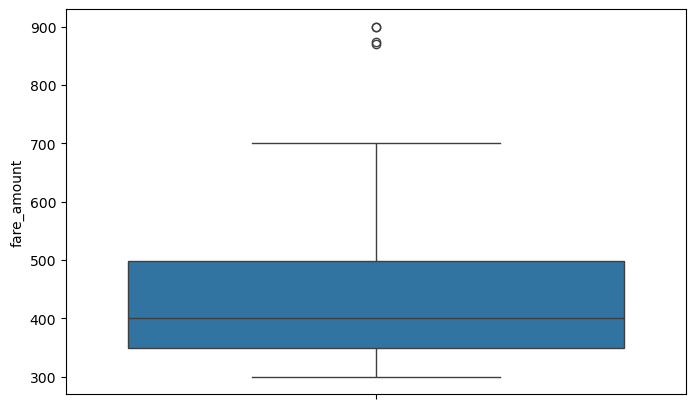

In [69]:
# Continue with outlier handling

outliers1 = df[(df["trip_distance"] <= 0.01) & (df["fare_amount"] > 300)]

plt.figure(figsize=(8, 5))
sns.boxplot(y=outliers1["fare_amount"])
plt.show()


In [71]:
df[(df["trip_distance"] <= 0.01) & (df["fare_amount"] > 700)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
783455          2  2023-05-26 15:46:18   2023-05-26 15:49:34              3.0   
959546          1  2023-06-28 03:01:46   2023-06-28 03:03:53              4.0   
1026892         2  2023-07-13 11:55:26   2023-07-13 11:55:32              1.0   
1700553         2  2023-11-21 15:02:50   2023-11-21 15:03:02              2.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
783455             0.0         5.0            13            13             3   
959546             0.0         5.0           265           265             1   
1026892            0.0         5.0           265           265             2   
1700553            0.0         5.0           265           265             4   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
783455        870.00    0.0      0.0         0.0          27.0   
959546        900.00    0.0      0.0         0.0           0.0   
1026892       900.00    0.0      0.0         0.0           0.0   
1700553       872.99    0.0      0.0         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
783455                     1.0        900.50                   2.5   
959546                     1.0        901.00                   0.0   
1026892                    1.0        901.00                   0.0   
1700553                    1.0        873.99                   0.0   

               date  hour  Airport_fee  
783455   2023-05-26    15          0.0  
959546   2023-06-28     3          0.0  
1026892  2023-07-13    11          0.0  
1700553  2023-11-21    15          0.0

In [73]:
df.shape[0]#1896379
df=df[~((df["trip_distance"] <= 0.01) & (df["fare_amount"] > 700))]#4
df.shape[0]#1896377

1915494

In [75]:
df[(df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
22900           1  2023-01-06 13:54:53   2023-01-06 13:54:53              3.0   
26994           1  2023-01-07 03:25:19   2023-01-07 03:25:19              1.0   
29649           1  2023-01-07 17:58:01   2023-01-07 17:58:01              3.0   
83577           1  2023-01-18 15:11:43   2023-01-18 15:11:43              1.0   
83858           1  2023-01-18 16:50:44   2023-01-18 16:50:44              1.0   
...           ...                  ...                   ...              ...   
1829038         1  2023-12-14 12:08:20   2023-12-14 12:08:20              1.0   
1837491         1  2023-12-15 15:03:31   2023-12-15 15:10:38              1.0   
1875425         2  2023-12-21 21:36:06   2023-12-21 21:36:16              1.0   
1903357         1  2023-12-29 01:17:55   2023-12-29 01:17:55              1.0   
1913974         1  2023-12-31 17:36:00   2023-12-31 17:36:00              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
22900              0.0         1.0           138           264             2   
26994              0.0         5.0           114           264             2   
29649              0.0         5.0           161           264             2   
83577              0.0         1.0           236           264             2   
83858              0.0         1.0           161           264             2   
...                ...         ...           ...           ...           ...   
1829038            0.0         2.0           143           264             4   
1837491            0.0        99.0           165           178             1   
1875425            0.0         1.0            97            49             2   
1903357            0.0         5.0           224           264             2   
1913974            0.0         5.0            48           264             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
22900            0.0    0.0      0.0         0.0           0.0   
26994            0.0    0.0      0.0         0.0           0.0   
29649            0.0    0.0      0.0         0.0           0.0   
83577            0.0    0.0      0.0         0.0           0.0   
83858            0.0    0.0      0.0         0.0           0.0   
...              ...    ...      ...         ...           ...   
1829038          0.0    0.0      0.0         0.0           0.0   
1837491          0.0    0.0      0.0         0.0           0.0   
1875425          0.0    0.0     -0.5         0.0           0.0   
1903357          0.0    0.0      0.0         0.0           0.0   
1913974          0.0    0.0      0.0         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
22900                      0.0           0.0                   0.0   
26994                      0.0           0.0                   0.0   
29649                      0.0           0.0                   0.0   
83577                      0.0           0.0                   0.0   
83858                      0.0           0.0                   0.0   
...                        ...           ...                   ...   
1829038                    0.0           0.0                   0.0   
1837491                    0.0           0.0                   0.0   
1875425                   -1.0          -1.5                   0.0   
1903357                    0.0           0.0                   0.0   
1913974                    0.0           0.0                   0.0   

               date  hour  Airport_fee  
22900    2023-01-06    13          0.0  
26994    2023-01-07     3          0.0  
29649    2023-01-07    17          0.0  
83577    2023-01-18    15          0.0  
83858    2023-01-18    16          0.0  
...             ...   ...          ...  
1829038  2023-12-14    12          0.0  
1837491  2023-12-15    15          0.0  
1875425  2023-12-21    21          0.0  
1903357  2023-12-29     1      

In [77]:
df.shape[0]
df=df[~((df["trip_distance"] <= 0.0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]#63 records
df.shape[0]

1915419

In [79]:
df[df["trip_distance"] > 250.0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3297            2  2023-01-01 19:40:43   2023-01-01 20:21:48              1.0   
25841           2  2023-01-06 22:32:00   2023-01-06 22:48:00              1.0   
53092           2  2023-01-12 15:52:48   2023-01-12 16:03:55              1.0   
56304           2  2023-01-13 05:53:00   2023-01-13 06:02:00              1.0   
170804          2  2023-02-04 07:16:00   2023-02-04 07:43:00              1.0   
204438          2  2023-02-10 19:53:45   2023-02-10 20:01:48              2.0   
258338          2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   
272027          2  2023-02-23 19:21:40   2023-02-23 20:11:37              2.0   
299525          2  2023-03-01 07:57:00   2023-03-01 08:22:00              1.0   
310689          2  2023-03-02 04:54:00   2023-03-02 05:04:00              1.0   
310943          2  2023-03-02 07:28:00   2023-03-02 07:34:00              1.0   
410073          2  2023-03-18 07:09:00   2023-03-18 07:22:00              1.0   
557087          2  2023-04-14 15:08:37   2023-04-14 15:59:51              1.0   
569573          2  2023-04-16 16:44:26   2023-04-16 17:09:03              2.0   
607207          2  2023-04-23 09:34:12   2023-04-23 10:06:17              1.0   
610877          2  2023-04-23 23:23:32   2023-04-23 23:43:40              1.0   
621042          2  2023-04-28 17:08:00   2023-04-28 18:03:00              1.0   
628397          2  2023-04-29 22:24:00   2023-04-29 22:47:00              1.0   
694617          2  2023-05-07 14:38:00   2023-05-07 15:06:00              1.0   
703337          2  2023-05-12 07:56:00   2023-05-12 08:58:00              1.0   
740670          2  2023-05-19 06:01:00   2023-05-19 06:28:00              1.0   
759289          2  2023-05-22 12:05:00   2023-05-22 12:37:00              1.0   
796064          2  2023-05-29 13:13:00   2023-05-29 14:23:00              1.0   
847957          2  2023-06-07 18:44:44   2023-06-07 19:31:36              1.0   
936145          2  2023-06-23 16:06:45   2023-06-23 16:59:20              1.0   
952380          2  2023-06-26 18:00:27   2023-06-26 22:45:22              1.0   
981384          2  2023-07-02 18:51:00   2023-07-02 19:08:00              1.0   
984177          2  2023-07-03 17:50:00   2023-07-03 18:03:00              1.0   
1004971         2  2023-07-08 19:02:00   2023-07-08 19:21:00              1.0   
1043329         2  2023-07-16 15:21:00   2023-07-16 15:38:00              1.0   
1052318         2  2023-07-18 15:31:28   2023-07-18 16:00:37              1.0   
1094197         2  2023-07-26 19:50:15   2023-07-26 20:00:16              2.0   
1153762         2  2023-08-08 10:34:04   2023-08-08 10:44:33              1.0   
1212287         2  2023-08-20 21:39:00   2023-08-20 21:48:00              1.0   
1216987         2  2023-08-22 08:07:00   2023-08-22 08:27:00              1.0   
1217458         2  2023-08-22 10:34:00   2023-08-22 11:06:00              1.0   
1249743         2  2023-08-29 15:41:00   2023-08-29 16:04:00              1.0   
1276198         2  2023-09-04 18:53:00   2023-09-04 19:02:00              1.0   
1362175         2  2023-09-20 06:39:00   2023-09-20 06:48:00              1.0   
1384588         2  2023-09-27 19:21:46   2023-09-27 19:41:46              1.0   
1389061         2  2023-09-28 15:42:16   2023-09-28 16:03:29              2.0   
1459793         2  2023-10-11 13:56:48   2023-10-11 14:17:05              1.0   
1580779         2  2023-11-01 09:34:00   2023-11-01 10:16:00              1.0   
1729846         2  2023-11-27 07:27:00   2023-11-27 07:59:00              1.0   
1853759         2  2023-12-18 07:37:00   2023-12-18 08:13:00              1.0   
1887448         2  2023-12-26 14:07:00   2023-12-26 14:24:00              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3297          62359.52         4.0            79            48             2   
25841          3140.87         1.0       

In [81]:
df.shape[0]
df=df[~(df["trip_distance"] > 250.0)]#46
df.shape[0]

1915373

In [83]:
df[df["payment_type"]==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5               2  2023-01-01 00:45:00   2023-01-01 01:21:00              1.0   
6               2  2023-01-01 00:56:00   2023-01-01 01:08:45              1.0   
38              2  2023-01-01 00:45:00   2023-01-01 01:04:00              1.0   
79              2  2023-01-01 00:53:00   2023-01-01 01:05:18              1.0   
103             2  2023-01-01 00:31:52   2023-01-01 01:04:54              1.0   
...           ...                  ...                   ...              ...   
1915475         2  2023-12-31 23:33:14   2024-01-01 00:01:27              1.0   
1915477         2  2023-12-31 23:29:09   2023-12-31 23:37:54              1.0   
1915480         2  2023-12-31 23:11:12   2023-12-31 23:29:59              1.0   
1915491         2  2023-12-31 23:37:18   2023-12-31 23:49:31              1.0   
1915497         1  2023-12-31 23:44:41   2023-12-31 23:59:50              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
5                 6.00         1.0           234           225             0   
6                 2.89         1.0           181            17             0   
38                5.25         1.0           256           162             0   
79                4.46         1.0           238           244             0   
103               2.31         1.0            68           161             0   
...                ...         ...           ...           ...           ...   
1915475          12.43         1.0           216           145             0   
1915477           1.36         1.0            75           238             0   
1915480           8.66         1.0            43           243             0   
1915491           2.33         1.0           161           137             0   
1915497           3.00         1.0            65            17             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
5              38.77    0.0      0.5        0.00           0.0   
6              17.17    0.0      0.5        3.73           0.0   
38             28.36    0.0      0.5        2.27           0.0   
79             22.26    0.0      0.5        5.00           0.0   
103            18.41    0.0      0.5        3.36           0.0   
...              ...    ...      ...         ...           ...   
1915475        37.24    0.0      0.5        0.00           0.0   
1915477        11.63    0.0      0.5        0.00           0.0   
1915480        31.76    0.0      0.5        0.00           0.0   
1915491        15.81    0.0      0.5        0.00           0.0   
1915497        16.31    0.0      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
5                          1.0         42.77                   2.5   
6                          1.0         22.40                   2.5   
38                         1.0         34.63                   2.5   
79                         1.0         31.26                   2.5   
103                        1.0         25.77                   2.5   
...                        ...           ...                   ...   
1915475                    1.0         38.74                   2.5   
1915477                    1.0         13.13                   2.5   
1915480                    1.0         35.76                   2.5   
1915491                    1.0         19.81                   2.5   
1915497                    1.0         17.81                   2.5   

               date  hour  Airport_fee  
5        2023-01-01     0          0.0  
6        2023-01-01     0          0.0  
38       2023-01-01     0          0.0  
79       2023-01-01     0          0.0  
103      2023-01-01     0          0.0  
...             ...   ...          ...  
1915475  2023-12-31    23          0.0  
1915477  2023-12-31    23          0.0  
1915480  2023-12-31    23          0.0  
1915491  2023-12-31    23      

In [85]:
df.loc[df["payment_type"]==0, "payment_type"] = 5
df[df["payment_type"]==0] # 0 columns

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee]
Index: []

In [87]:
# Do any columns need standardising?

df["passenger_count"] = df["passenger_count"].astype(int)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

hour
0      54418
1      36563
2      24173
3      15989
4      10881
5      11324
6      26602
7      52209
8      72289
9      81619
10     88678
11     96271
12    104533
13    107852
14    115568
15    118555
16    118718
17    129087
18    135210
19    120831
20    107671
21    107545
22     99708
23     79079
dtype: int64


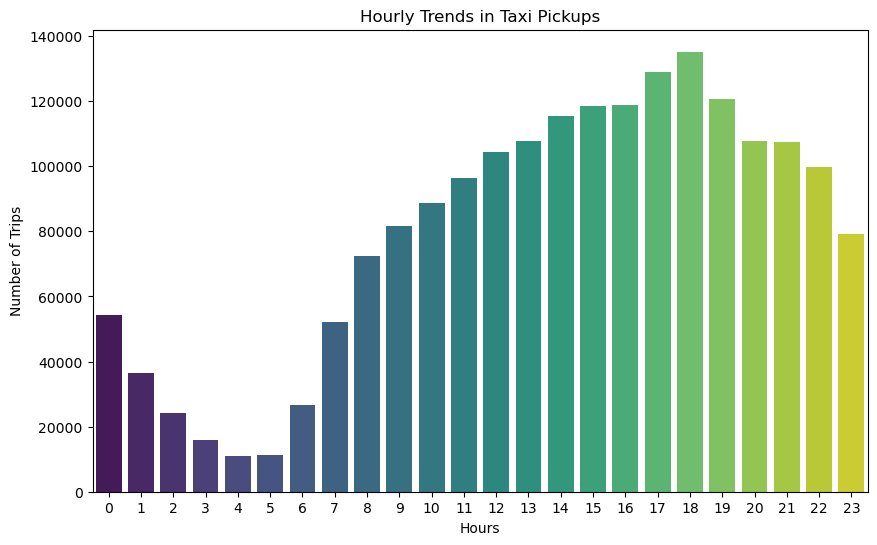

In [89]:
# Find and show the hourly trends in taxi pickups

hourly_trends=df.groupby("hour").size()
print(hourly_trends)
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_trends.index, y=hourly_trends.values, palette="viridis")
plt.xlabel("Hours")
plt.ylabel("Number of Trips")
plt.title("Hourly Trends in Taxi Pickups")
plt.show()

weekday
Monday       238743
Tuesday      276864
Wednesday    293227
Thursday     300101
Friday       285088
Saturday     279106
Sunday       242244
dtype: int64


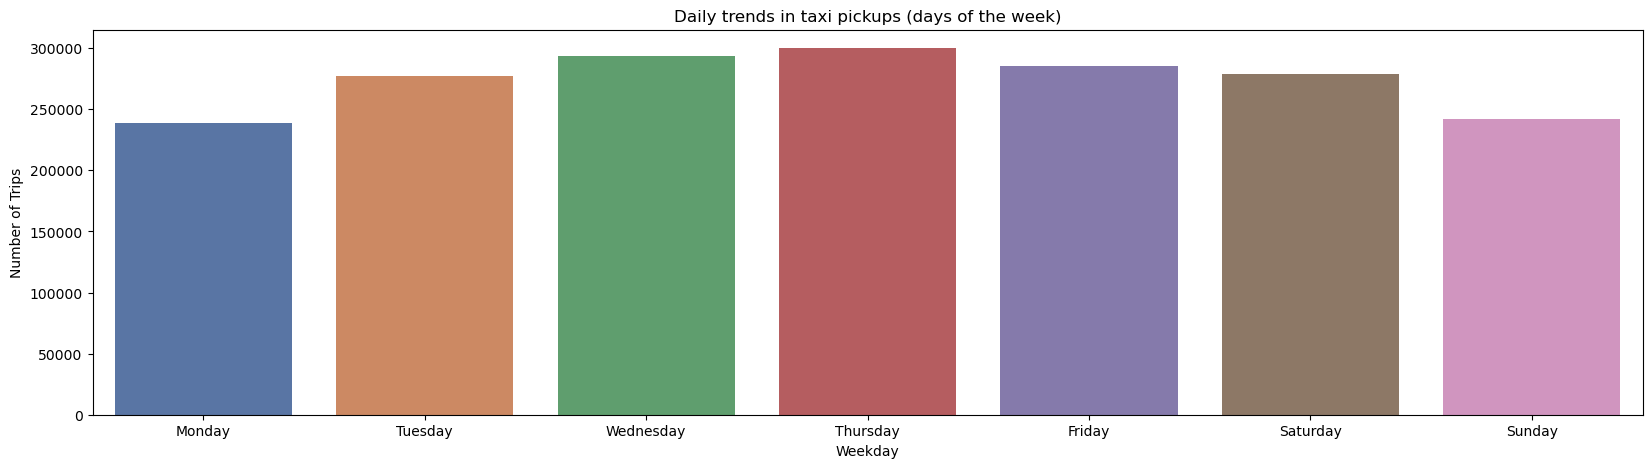

In [91]:
# Find and show the daily trends in taxi pickups (days of the week)
df["weekday"] = df["tpep_pickup_datetime"].dt.day_name()#to get the day of week
weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_trends=df.groupby("weekday").size().reindex(weekdays_order)
print(daily_trends)
plt.figure(figsize=(20,5))
sns.barplot(x=daily_trends.index, y=daily_trends.values, palette="deep")
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.title("Daily trends in taxi pickups (days of the week)")
plt.show()


Month
January      153324
February     145677
March        170177
April        164392
May          175674
June         165346
July         145336
August       141212
September    142325
October      176110
November     166977
December     168823
dtype: int64


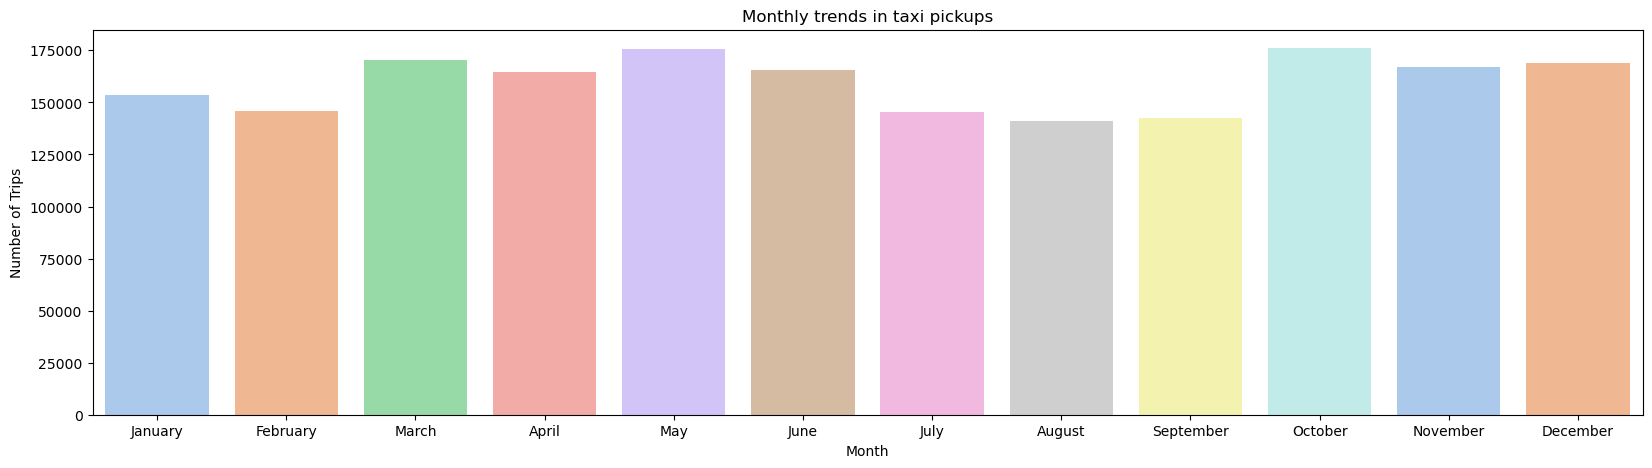

In [93]:
# Show the monthly trends in pickups
df["Month"] = df["tpep_pickup_datetime"].dt.month_name()#to get the month
month_order = ["January", "February", "March", "April", "May", "June", "July","August","September","October","November","December"]
month_trends=df.groupby("Month").size().reindex(month_order)
print(month_trends)
plt.figure(figsize=(20,5))
sns.barplot(x=month_trends.index, y=month_trends.values, palette="pastel")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Monthly trends in taxi pickups")
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [95]:
# Analyse the above parameters

# Analyse the above parameters
df[df["fare_amount"]<=0] # 588 columns
df[df["tip_amount"]<=0] # 435873 columns
df[df["total_amount"]<=0] # 264 columns
df[df["trip_distance"]<=0] # 37657 columns

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
131             2  2023-01-01 00:37:17   2023-01-01 00:38:51                1   
141             2  2023-01-01 00:41:31   2023-01-01 00:47:31                1   
272             1  2023-01-01 01:15:59   2023-01-01 01:17:29                1   
292             1  2023-01-01 01:42:33   2023-01-01 01:43:18                1   
315             2  2023-01-01 01:38:46   2023-01-01 01:39:13                1   
...           ...                  ...                   ...              ...   
1915372         1  2023-12-31 23:04:03   2023-12-31 23:19:47                1   
1915373         1  2023-12-31 23:24:49   2023-12-31 23:33:40                1   
1915387         2  2023-12-31 23:27:32   2023-12-31 23:27:44                1   
1915455         1  2023-12-31 23:30:15   2024-01-01 00:08:07                1   
1915466         1  2023-12-31 23:17:49   2023-12-31 23:34:17                1   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
131                0.0         5.0           255           264             1   
141                0.0         1.0           170           233             2   
272                0.0         1.0           148           148             1   
292                0.0         5.0            79            79             1   
315                0.0         1.0            74            74             5   
...                ...         ...           ...           ...           ...   
1915372            0.0         1.0           128           244             5   
1915373            0.0         1.0           260           157             5   
1915387            0.0         1.0           142           142             5   
1915455            0.0         1.0            76            54             5   
1915466            0.0         1.0           239           244             5   

         fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
131            40.00  ...        8.20           0.0                    1.0   
141             6.50  ...        0.00           0.0                    1.0   
272             3.70  ...        0.00           0.0                    1.0   
292            35.00  ...        0.00           0.0                    1.0   
315            25.11  ...        3.99           0.0                    1.0   
...              ...  ...         ...           ...                    ...   
1915372        16.50  ...        0.00           0.0                    1.0   
1915373        10.07  ...        0.00           0.0                    1.0   
1915387        13.86  ...        0.00           0.0                    1.0   
1915455        47.43  ...        0.00           0.0                    1.0   
1915466        20.54  ...        0.00           0.0                    1.0   

         total_amount  congestion_surcharge        date  hour Airport_fee  \
131             49.20                   0.0  2023-01-01     0         0.0   
141             11.50                   2.5  2023-01-01     0         0.0   
272              8.70                   2.5  2023-01-01     1         0.0   
292             36.00                   0.0  2023-01-01     1         0.0   
315             30.60                   2.5  2023-01-01     1         0.0   
...               ...                   ...         ...   ...         ...   
1915372         18.00                   2.5  2023-12-31    23         0.0   
1915373         11.57                   2.5  2023-12-31    23         0.0   
1915387         17.86                   2.5  2023-12-31    23         0.0   
1915455         48.93                   2.5  2023-12-31    23         0.0   
1915466         24.54                   2.5  2023-12-31    23         0.0   

         weekday     Month  
131       Sunday   January  
141       Sunday   January  
272       Sunday   January  
292       Sunday   January  
315       Sunday   January  
...          ...       ...  
1915372   

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [97]:
# Create a df with non zero entries for the selected parameters.

df[df["fare_amount"]<=0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
51              2  2023-01-01 00:31:44   2023-01-01 00:51:27                2   
138             2  2023-01-01 00:11:23   2023-01-01 00:24:21                1   
170             2  2023-01-01 00:40:02   2023-01-01 01:07:56                1   
174             2  2023-01-01 00:33:21   2023-01-01 00:47:59                3   
218             2  2023-01-01 00:40:34   2023-01-01 01:01:20                1   
...           ...                  ...                   ...              ...   
1915325         2  2023-12-31 23:00:11   2023-12-31 23:14:14                1   
1915354         2  2023-12-31 23:21:30   2023-12-31 23:31:08                1   
1915426         2  2023-12-31 23:11:37   2023-12-31 23:33:26                2   
1915446         2  2023-12-31 23:26:05   2023-12-31 23:27:56                1   
1915508         2  2023-12-31 23:40:07   2023-12-31 23:41:11                1   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
51                5.21         1.0           186           144             4   
138               2.14         1.0           137           144             4   
170               9.90         1.0            90            67             4   
174               8.17         4.0           132           265             4   
218               3.86         1.0            50           162             4   
...                ...         ...           ...           ...           ...   
1915325           1.78         1.0           238           143             5   
1915354           0.76         1.0            68           186             4   
1915426           8.51         1.0           138            28             4   
1915446           0.57         1.0           263           141             4   
1915508           0.12         1.0           211           211             4   

         fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
51             -26.1  ...         0.0          0.00                   -1.0   
138            -14.2  ...         0.0          0.00                   -1.0   
170            -43.6  ...         0.0         -6.55                   -1.0   
174            -39.4  ...         0.0          0.00                   -1.0   
218            -21.9  ...         0.0          0.00                   -1.0   
...              ...  ...         ...           ...                    ...   
1915325         -1.0  ...         0.0          0.00                    1.0   
1915354        -10.0  ...         0.0          0.00                   -1.0   
1915426        -38.0  ...         0.0          0.00                   -1.0   
1915446         -4.4  ...         0.0          0.00                   -1.0   
1915508         -3.7  ...         0.0          0.00                   -1.0   

         total_amount  congestion_surcharge        date  hour Airport_fee  \
51             -31.10                  -2.5  2023-01-01     0        0.00   
138            -19.20                  -2.5  2023-01-01     0        0.00   
170            -55.15                  -2.5  2023-01-01     0        0.00   
174            -43.15                   0.0  2023-01-01     0       -1.25   
218            -26.90                  -2.5  2023-01-01     0        0.00   
...               ...                   ...         ...   ...         ...   
1915325          3.00                   2.5  2023-12-31    23        0.00   
1915354        -15.00                  -2.5  2023-12-31    23        0.00   
1915426        -47.25                   0.0  2023-12-31    23       -1.75   
1915446         -9.40                  -2.5  2023-12-31    23        0.00   
1915508         -8.70                  -2.5  2023-12-31    23        0.00   

         weekday     Month  
51        Sunday   January  
138       Sunday   January  
170       Sunday   January  
174       Sunday   January  
218       Sunday   January  
...          ...       ...  
1915325   

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Month
January      4136550.10
February     3918672.85
March        4719209.32
April        4637378.10
May          5071061.97
June         4767286.06
July         4144529.69
August       4030978.60
September    4214765.62
October      5129584.48
November     4761151.48
December     4813780.39
Name: total_amount, dtype: float64


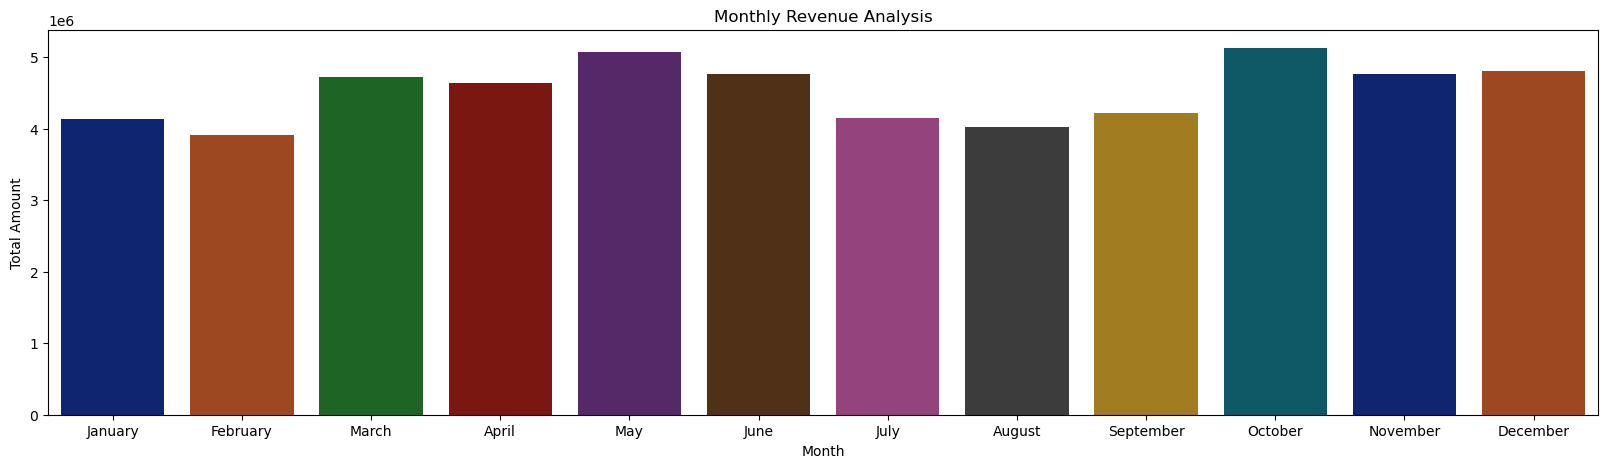

In [99]:
# Group data by month and analyse monthly revenue

monthly_revenue = df.groupby('Month')['total_amount'].sum().reindex(month_order)
print(monthly_revenue)
plt.figure(figsize=(20,5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="dark")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.title("Monthly Revenue Analysis")
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

quarter
Q1    12774432.27
Q2    14475726.13
Q3    12390273.91
Q4    14704516.35
Name: total_amount, dtype: float64
quarter
Q1    23.506200
Q2    26.636746
Q3    22.799311
Q4    27.057743
Name: total_amount, dtype: float64


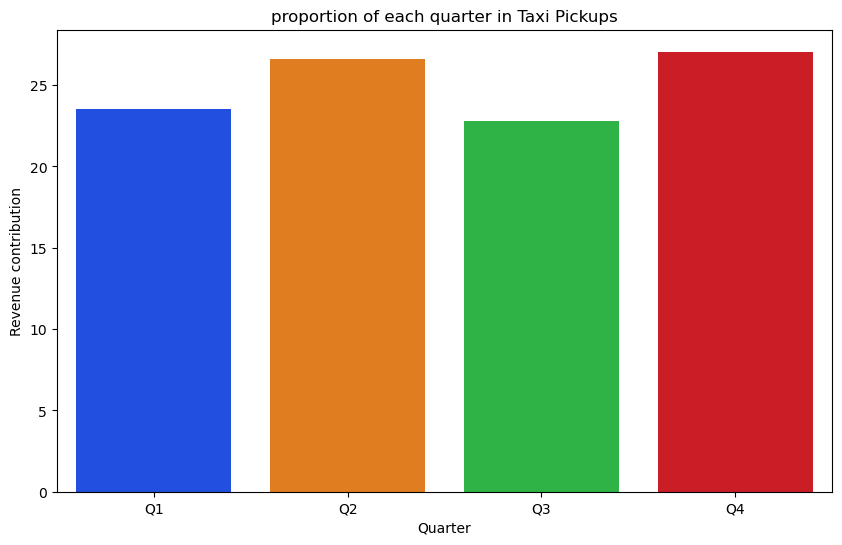

In [101]:
# Calculate proportion of each quarter

df['quarter'] = 'Q' + df['tpep_pickup_datetime'].dt.quarter.astype(str)
quarter_order = ["Q1","Q2","Q3","Q4"]
quarter_revenue=df.groupby('quarter')['total_amount'].sum().reindex(quarter_order)
print(quarter_revenue)
quarter_proportion = (quarter_revenue / quarter_revenue.sum()) * 100
print(quarter_proportion)
plt.figure(figsize=(10,6))
sns.barplot(x=quarter_proportion.index, y=quarter_proportion.values, palette="bright")
plt.xlabel("Quarter")
plt.ylabel("Revenue contribution")
plt.title("proportion of each quarter in Taxi Pickups")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

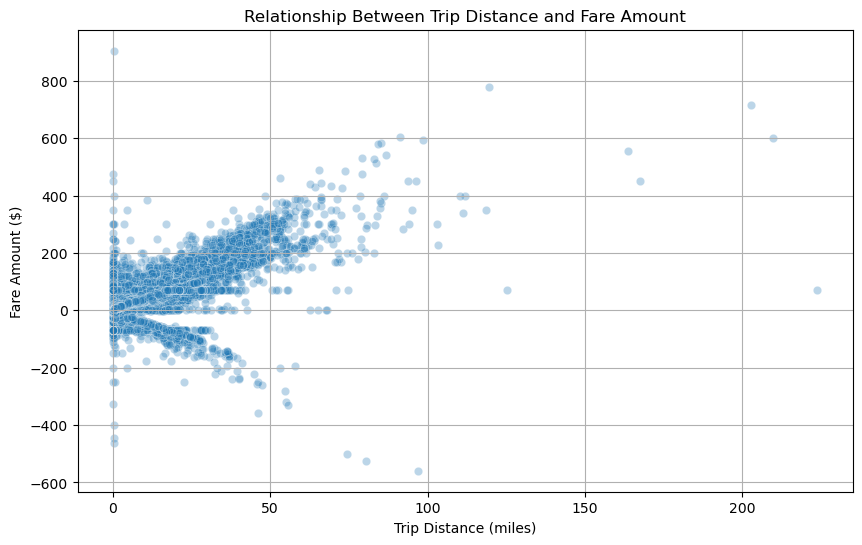

In [103]:
# Show how trip fare is affected by distance

trip_distance=df[~(df["trip_distance"] == 0)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trip_distance, x="trip_distance", y="fare_amount", alpha=0.3)
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [105]:
# Show relationship between fare and trip duration

df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
df[(df["trip_duration"] < 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
179700          6  2023-02-06 08:02:58   2023-02-06 08:02:37                1   
186747          6  2023-02-07 16:02:09   2023-02-07 16:02:08                1   
189301          6  2023-02-08 06:02:31   2023-02-08 06:02:24                1   
222941          6  2023-02-14 13:02:46   2023-02-14 13:02:16                1   
226741          1  2023-02-15 05:00:00   2023-02-15 04:53:51                1   
...           ...                  ...                   ...              ...   
1695201         6  2023-11-20 15:11:57   2023-11-20 15:11:20                1   
1698023         6  2023-11-21 06:11:25   2023-11-21 06:11:24                1   
1717013         6  2023-11-24 00:11:55   2023-11-24 00:11:07                1   
1717042         6  2023-11-24 00:11:49   2023-11-24 00:11:46                1   
1722194         1  2023-11-25 12:32:33   2023-11-25 12:32:13                1   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
179700            3.39         1.0           265            75             5   
186747           16.44         1.0           265           205             5   
189301            9.28         1.0           265           164             5   
222941            3.52         1.0           265           236             5   
226741            1.00        99.0            42           152             1   
...                ...         ...           ...           ...           ...   
1695201           5.37         1.0           265           232             5   
1698023           4.94         1.0           265           137             5   
1717013           3.73         1.0           265            74             5   
1717042          19.54         1.0           265            76             5   
1722194           0.50         1.0           143           143             1   

         fare_amount  ...  improvement_surcharge  total_amount  \
179700         28.20  ...                    0.3         29.00   
186747         68.69  ...                    0.3         69.49   
189301         32.79  ...                    0.3         33.59   
222941         21.07  ...                    0.3         21.87   
226741         15.20  ...                    1.0         16.70   
...              ...  ...                    ...           ...   
1695201        54.20  ...                    0.3         55.00   
1698023        10.04  ...                    0.3         10.84   
1717013        18.96  ...                    0.3         19.76   
1717042        53.26  ...                    0.3         54.06   
1722194         5.80  ...                    1.0         11.75   

         congestion_surcharge        date  hour  Airport_fee    weekday  \
179700                    2.5  2023-02-06     8          0.0     Monday   
186747                    2.5  2023-02-07    16          0.0    Tuesday   
189301                    2.5  2023-02-08     6          0.0  Wednesday   
222941                    2.5  2023-02-14    13          0.0    Tuesday   
226741                    0.0  2023-02-15     5          0.0  Wednesday   
...                       ...         ...   ...          ...        ...   
1695201                   2.5  2023-11-20    15          0.0     Monday   
1698023                   2.5  2023-11-21     6          0.0    Tuesday   
1717013                   2.5  2023-11-24     0          0.0     Friday   
1717042                   2.5  2023-11-24     0          0.0     Friday   
1722194                   2.5  2023-11-25    12          0.0   Saturday   

            Month  quarter  trip_duration  
179700   February       Q1      -0.350000  
186747   February       Q1      -0.016667  
189301   February       Q1      -0.116667  
222941   February       Q1      -0.500000  
226741   February       Q1      -6.150000  
...           ...      ...            ...  
1695201  November       Q4      -0.616667  
1698023  November       Q4   

In [107]:
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
df[(df["trip_duration"] < 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
179700          6  2023-02-06 08:02:58   2023-02-06 08:02:37                1   
186747          6  2023-02-07 16:02:09   2023-02-07 16:02:08                1   
189301          6  2023-02-08 06:02:31   2023-02-08 06:02:24                1   
222941          6  2023-02-14 13:02:46   2023-02-14 13:02:16                1   
226741          1  2023-02-15 05:00:00   2023-02-15 04:53:51                1   
...           ...                  ...                   ...              ...   
1695201         6  2023-11-20 15:11:57   2023-11-20 15:11:20                1   
1698023         6  2023-11-21 06:11:25   2023-11-21 06:11:24                1   
1717013         6  2023-11-24 00:11:55   2023-11-24 00:11:07                1   
1717042         6  2023-11-24 00:11:49   2023-11-24 00:11:46                1   
1722194         1  2023-11-25 12:32:33   2023-11-25 12:32:13                1   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
179700            3.39         1.0           265            75             5   
186747           16.44         1.0           265           205             5   
189301            9.28         1.0           265           164             5   
222941            3.52         1.0           265           236             5   
226741            1.00        99.0            42           152             1   
...                ...         ...           ...           ...           ...   
1695201           5.37         1.0           265           232             5   
1698023           4.94         1.0           265           137             5   
1717013           3.73         1.0           265            74             5   
1717042          19.54         1.0           265            76             5   
1722194           0.50         1.0           143           143             1   

         fare_amount  ...  improvement_surcharge  total_amount  \
179700         28.20  ...                    0.3         29.00   
186747         68.69  ...                    0.3         69.49   
189301         32.79  ...                    0.3         33.59   
222941         21.07  ...                    0.3         21.87   
226741         15.20  ...                    1.0         16.70   
...              ...  ...                    ...           ...   
1695201        54.20  ...                    0.3         55.00   
1698023        10.04  ...                    0.3         10.84   
1717013        18.96  ...                    0.3         19.76   
1717042        53.26  ...                    0.3         54.06   
1722194         5.80  ...                    1.0         11.75   

         congestion_surcharge        date  hour  Airport_fee    weekday  \
179700                    2.5  2023-02-06     8          0.0     Monday   
186747                    2.5  2023-02-07    16          0.0    Tuesday   
189301                    2.5  2023-02-08     6          0.0  Wednesday   
222941                    2.5  2023-02-14    13          0.0    Tuesday   
226741                    0.0  2023-02-15     5          0.0  Wednesday   
...                       ...         ...   ...          ...        ...   
1695201                   2.5  2023-11-20    15          0.0     Monday   
1698023                   2.5  2023-11-21     6          0.0    Tuesday   
1717013                   2.5  2023-11-24     0          0.0     Friday   
1717042                   2.5  2023-11-24     0          0.0     Friday   
1722194                   2.5  2023-11-25    12          0.0   Saturday   

            Month  quarter  trip_duration  
179700   February       Q1      -0.350000  
186747   February       Q1      -0.016667  
189301   February       Q1      -0.116667  
222941   February       Q1      -0.500000  
226741   February       Q1      -6.150000  
...           ...      ...            ...  
1695201  November       Q4      -0.616667  
1698023  November       Q4   

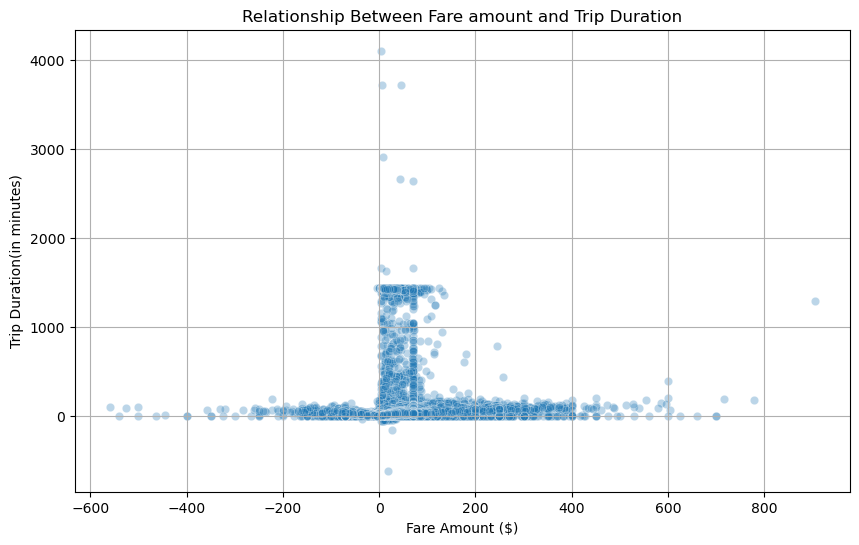

Correlation between fare_amount and trip_duration: 0.260


In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="fare_amount", y="trip_duration", alpha=0.3)
plt.title("Relationship Between Fare amount and Trip Duration")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Trip Duration(in minutes)")
plt.grid(True)
plt.show()
correlation = df['fare_amount'].corr(df['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {correlation:.3f}")

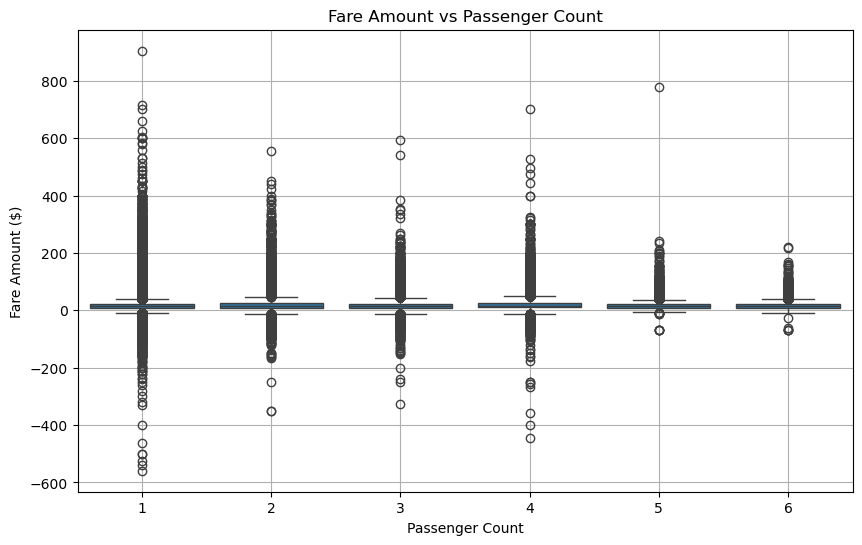

Correlation between fare_amount and passenger_count: 0.039


In [111]:
# Show relationship between fare and number of passengers

df[(df["passenger_count"] == 0)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()
correlation = df['fare_amount'].corr(df['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {correlation:.3f}")

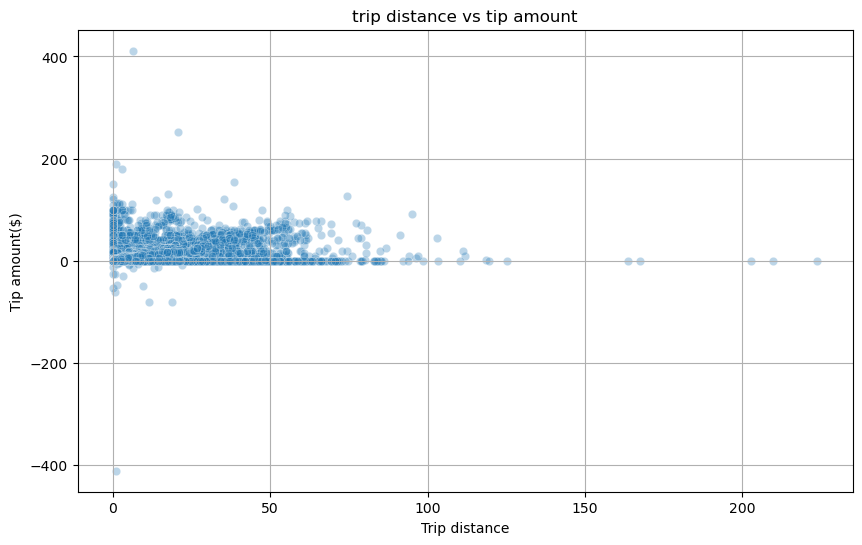

Correlation between fare_amount and passenger_count: 0.572


In [113]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="trip_distance", y="tip_amount", alpha=0.3)
plt.title("trip distance vs tip amount")
plt.xlabel("Trip distance")
plt.ylabel("Tip amount($)")
plt.grid(True)
plt.show()
correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between fare_amount and passenger_count: {correlation:.3f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type_label
Credit card    1492329
Cash            320702
Unknown          65111
Dispute          25024
No charge        12207
Name: count, dtype: int64


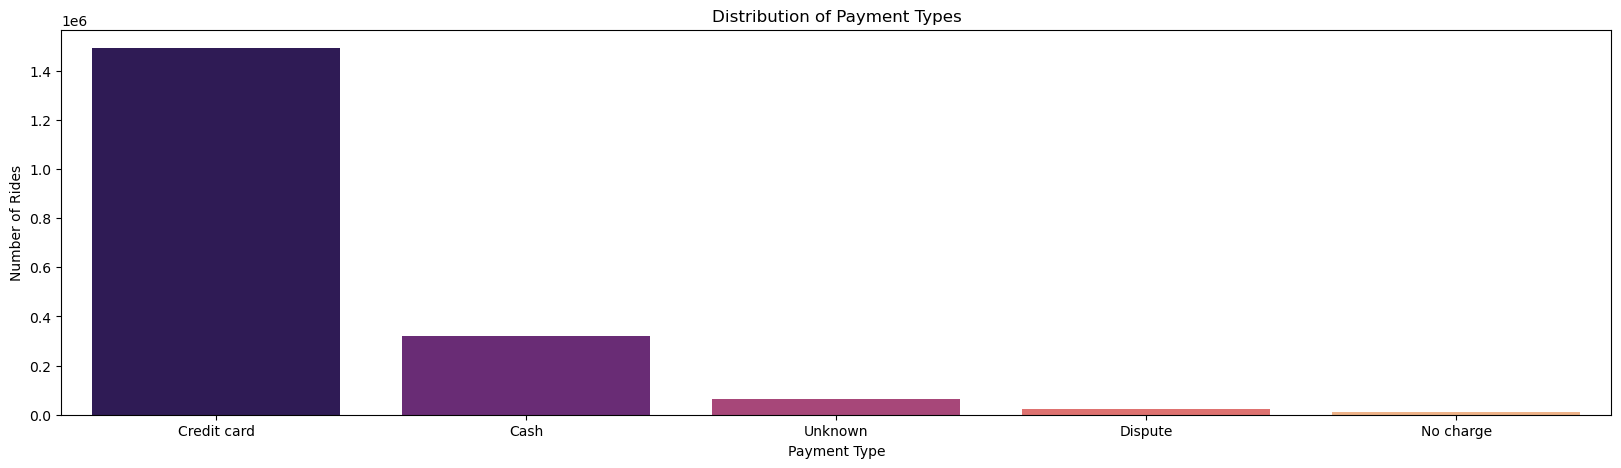

In [115]:
# Analyse the distribution of different payment types (payment_type).


payment_type_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown'
}

df['payment_type_label'] = df['payment_type'].map(payment_type_labels)

# Count and sort
payment_counts = df['payment_type_label'].value_counts()
print(payment_counts)
# Plot
plt.figure(figsize=(20, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values,palette="magma")
plt.title("Distribution of Payment Types")
plt.ylabel("Number of Rides")
plt.xlabel("Payment Type")
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [117]:
!pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --------------------- ------------------ 174.1/323.6 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/19.2 MB 25.8 MB/s eta 0:00:01
   ----- ---------------------------------- 2.5/19.2 MB 31.5 MB/s eta 0:00:01
   -------- ------------------------------- 3.9/19.2 MB 31.3 MB/s eta 0:00:01
   ----------- ---------------------------- 5.5/19.2 MB 31.9 MB/s eta 0:00:01
   --------------- ------------------------ 7.5/19.2 MB 34.0 MB/s eta 0:00:01
   ------------------- -------------------- 9.2/19.2 MB 34.4 MB/s eta 0:00:01
   ----------------------- ---------------- 11.1/19.2 MB 38.5 MB/s eta 0:00:01
   --------------------------- ------------ 13.2/19.2 MB 38.5 MB/s eta 0:00:01
   ----------------------------- ---------- 14.0/19.2 MB 36.4 MB/s eta 0:

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [127]:
# import geopandas as gpd
import geopandas as gpd


# Read the shapefile using geopandas
zones =  gpd.read_file(r'C:\Users\saivi\Downloads\EDA-NYC-Taxi (1)\taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

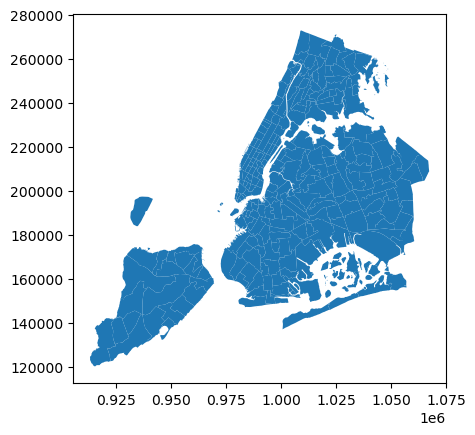

In [129]:
print(zones.info())
zones = gpd.GeoDataFrame(zones, geometry='geometry')
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [131]:
# Merge zones and trip records using locationID and PULocationID

df=pd.merge(left=df,right=zones, how='left', left_on='PULocationID', right_on='LocationID')
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:10:30   2023-01-01 00:11:49                1   
1         2  2023-01-01 00:49:02   2023-01-01 00:55:15                1   
2         1  2023-01-01 00:47:17   2023-01-01 01:07:01                2   
3         2  2023-01-01 00:06:02   2023-01-01 00:31:38                1   
4         2  2023-01-01 00:02:19   2023-01-01 00:30:49                1   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.49         1.0           239           238             1   
1           0.75         1.0            45           148             2   
2           2.90         1.0           142           170             1   
3           2.50         1.0            43           161             1   
4          20.37         2.0           132           140             1   

   fare_amount  ...  quarter  trip_duration  payment_type_label  OBJECTID  \
0          4.4  ...       Q1       1.316667         Credit card     239.0   
1          7.9  ...       Q1       6.216667                Cash      45.0   
2         19.1  ...       Q1      19.733333         Credit card     142.0   
3         24.0  ...       Q1      25.600000         Credit card      43.0   
4         70.0  ...       Q1      28.500000         Credit card     132.0   

   Shape_Leng  Shape_Area                   zone LocationID    borough  \
0    0.063626    0.000205  Upper West Side South      239.0  Manhattan   
1    0.045907    0.000091              Chinatown       45.0  Manhattan   
2    0.038176    0.000076    Lincoln Square East      142.0  Manhattan   
3    0.099739    0.000380           Central Park       43.0  Manhattan   
4    0.245479    0.002038            JFK Airport      132.0     Queens   

                                            geometry  
0  POLYGON ((991168.979 226252.992, 991955.565 22...  
1  POLYGON ((984941.821 199431.157, 984958.446 19...  
2  POLYGON ((989380.305 218980.247, 989359.803 21...  
3  POLYGON ((991852.973 217950.807, 991725.244 21...  
4  MULTIPOLYGON (((1032791.001 181085.006, 103283...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [133]:
# Group data by location and calculate the number of trips

trip_count = df.groupby("LocationID").size().reset_index(name="trip_count")
print(trip_count)

     LocationID  trip_count
0           1.0         246
1           2.0           2
2           3.0          52
3           4.0        2388
4           5.0          19
..          ...         ...
249       259.0          68
250       260.0         412
251       261.0        9960
252       262.0       25872
253       263.0       36311

[254 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [135]:
# Merge trip counts back to the zones GeoDataFrame


zones=pd.merge(left=trip_count,right=zones, how='left', left_on='LocationID', right_on='LocationID')
zones.head()

LocationID  trip_count  OBJECTID  Shape_Leng  Shape_Area  \
0         1.0         246         1    0.116357    0.000782   
1         2.0           2         2    0.433470    0.004866   
2         3.0          52         3    0.084341    0.000314   
3         4.0        2388         4    0.043567    0.000112   
4         5.0          19         5    0.092146    0.000498   

                      zone        borough  \
0           Newark Airport            EWR   
1              Jamaica Bay         Queens   
2  Allerton/Pelham Gardens          Bronx   
3            Alphabet City      Manhattan   
4            Arden Heights  Staten Island   

                                            geometry  
0  POLYGON ((933100.918 192536.086, 933091.011 19...  
1  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  POLYGON ((935843.31 144283.336, 936046.565 144...

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

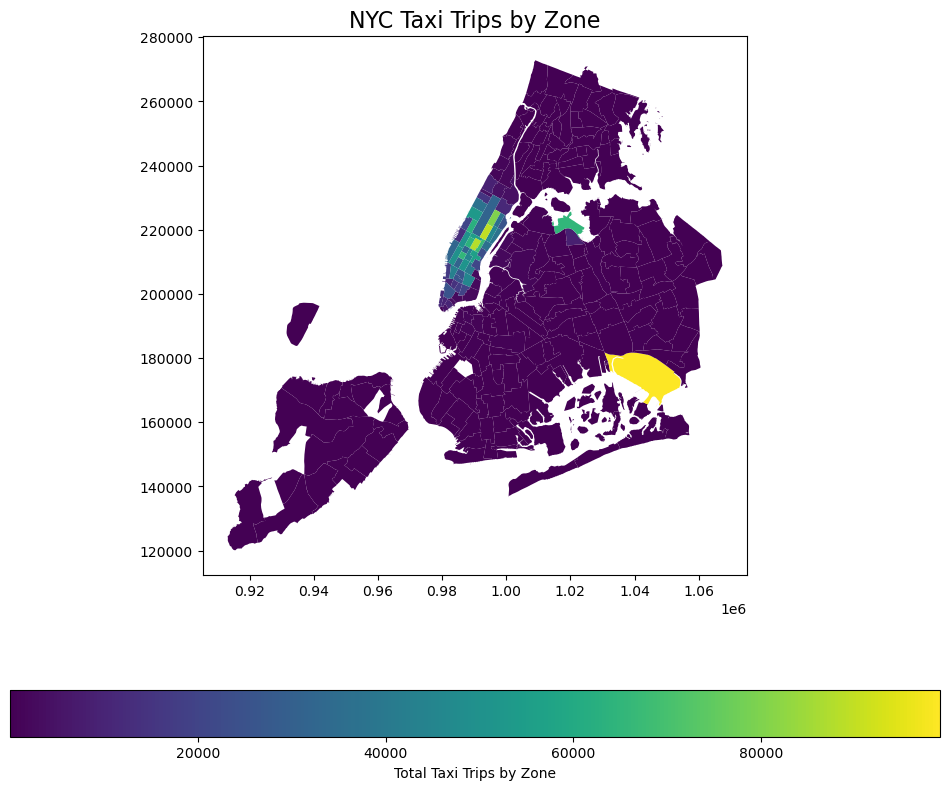

In [137]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
zones = gpd.GeoDataFrame(zones, geometry='geometry')
zones.plot(
    column='trip_count',                     
    cmap='viridis',                           
    linewidth=0.8,
    ax=ax,                        
    legend=True,
    legend_kwds={'label': "Total Taxi Trips by Zone", 'orientation': "horizontal"}
)
ax.set_title("NYC Taxi Trips by Zone", fontsize=16)
plt.show()
# Plot the map and display it



In [139]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by='trip_count', ascending=False)
print(zones_sorted)

     LocationID  trip_count  OBJECTID  Shape_Leng  Shape_Area  \
124       132.0       99043       132    0.245479    0.002038   
228       237.0       89665       237    0.042213    0.000096   
153       161.0       88083       161    0.035804    0.000072   
227       236.0       79942       236    0.044252    0.000103   
154       162.0       67204       162    0.035270    0.000048   
..          ...         ...       ...         ...         ...   
191       199.0           1       199    0.077809    0.000289   
83         84.0           1        84    0.233624    0.002074   
168       176.0           1       176    0.151995    0.000658   
29         30.0           1        30    0.094510    0.000146   
58         59.0           1        59    0.037795    0.000063   

                                  zone        borough  \
124                        JFK Airport         Queens   
228              Upper East Side South      Manhattan   
153                     Midtown Center      Manh

In [141]:
zones.sort_values(by='trip_count', ascending=True)

LocationID  trip_count  OBJECTID  Shape_Leng  Shape_Area  \
83         84.0           1        84    0.233624    0.002074   
58         59.0           1        59    0.037795    0.000063   
236       245.0           1       245    0.095983    0.000466   
29         30.0           1        30    0.094510    0.000146   
168       176.0           1       176    0.151995    0.000658   
..          ...         ...       ...         ...         ...   
154       162.0       67204       162    0.035270    0.000048   
227       236.0       79942       236    0.044252    0.000103   
153       161.0       88083       161    0.035804    0.000072   
228       237.0       89665       237    0.042213    0.000096   
124       132.0       99043       132    0.245479    0.002038   

                                  zone        borough  \
83   Eltingville/Annadale/Prince's Bay  Staten Island   
58                        Crotona Park          Bronx   
236                      West Brighton  Staten Island   
29                       Broad Channel         Queens   
168                            Oakwood  Staten Island   
..                                 ...            ...   
154                       Midtown East      Manhattan   
227              Upper East Side North      Manhattan   
153                     Midtown Center      Manhattan   
228              Upper East Side South      Manhattan   
124                        JFK Airport         Queens   

                                              geometry  
83   POLYGON ((939754.454 131548.91, 939802.804 131...  
58   POLYGON ((1014848.343 245121.005, 1015049.583 ...  
236  POLYGON ((957085.564 172591.26, 957142.385 172...  
29   POLYGON ((1034013.272 163473.152, 1034866.459 ...  
168  POLYGON ((950393.94 148827.195, 950393.983 148...  
..                                                 ...  
154  POLYGON ((992224.354 214415.293, 992096.999 21...  
227  POLYGON ((995940.048 221122.92, 995812.322 220...  
153  POLYGON ((991081.026 214453.698, 990952.644 21...  
228  POLYGON ((993633.442 216961.016, 993507.232 21...  
124  MULTIPOLYGON (((1032791.001 181085.006, 103283...  

[255 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [143]:
# Find routes which have the slowest speeds at different times of the day
route_hour=df.groupby(['PULocationID', 'DOLocationID', 'hour']).agg({
    'trip_distance': 'mean',
    'trip_duration': 'mean'
}).reset_index()
route_hour['avg_speed']=route_hour['trip_distance']/route_hour['trip_duration']
#route_hour.sort_values(by='avg_speed').head(200)
route_hour[route_hour['PULocationID'] != route_hour['DOLocationID']].sort_values(by='avg_speed').head(200)


PULocationID  DOLocationID  hour  trip_distance  trip_duration  \
138245           265            76     0          19.54      -0.050000   
138471           265           215    18          11.70      -0.033333   
138255           265            78    13           3.14      -0.016667   
138348           265           136    17          10.64      -0.066667   
138118           265             4    13           6.47      -0.050000   
...              ...           ...   ...            ...            ...   
112943           233            52    17           0.00      42.166667   
66560            142            35    21           0.00      50.700000   
66739            142            55    16           0.00      79.383333   
66872            142            79     4           0.00      17.216667   
66899            142            82     0           0.00      31.016667   

        avg_speed  
138245     -390.8  
138471     -351.0  
138255     -188.4  
138348     -159.6  
138118     -129.4  
...           ...  
112943        0.0  
66560         0.0  
66739         0.0  
66872         0.0  
66899         0.0  

[200 rows x 6 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

hour
0      54421
1      36564
2      24174
3      15991
4      10882
5      11327
6      26610
7      52219
8      72301
9      81626
10     88683
11     96278
12    104544
13    107855
14    115570
15    118564
16    118728
17    129091
18    135217
19    120833
20    107673
21    107545
22     99712
23     79083
Name: count, dtype: int64


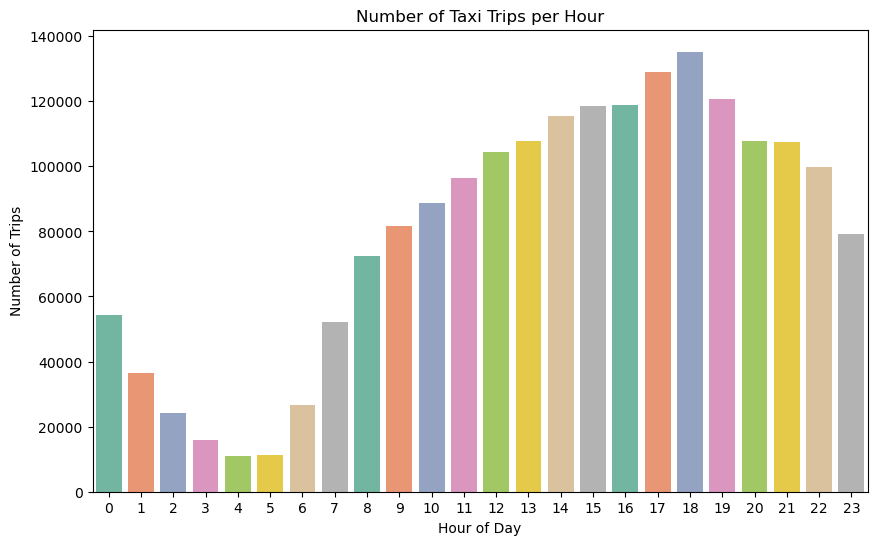

Busiest hour of the day is: 18:00 with number of trips: 135217


In [145]:
# Visualise the number of trips per hour and find the busiest hour

trips_per_hour = df['hour'].value_counts().sort_index()
print(trips_per_hour)
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values,palette="Set2")
plt.title("Number of Taxi Trips per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()
#busiest hour using idmax() function
print(f"Busiest hour of the day is: {trips_per_hour.idxmax()}:00 with number of trips: {trips_per_hour.max()}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [149]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.05#[5%]
scaled_trips=trips_per_hour/sample_fraction
scaled_trips.sort_values(ascending=False).head(5)



hour
18    2704340.0
17    2581820.0
19    2416660.0
16    2374560.0
15    2371280.0
Name: count, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

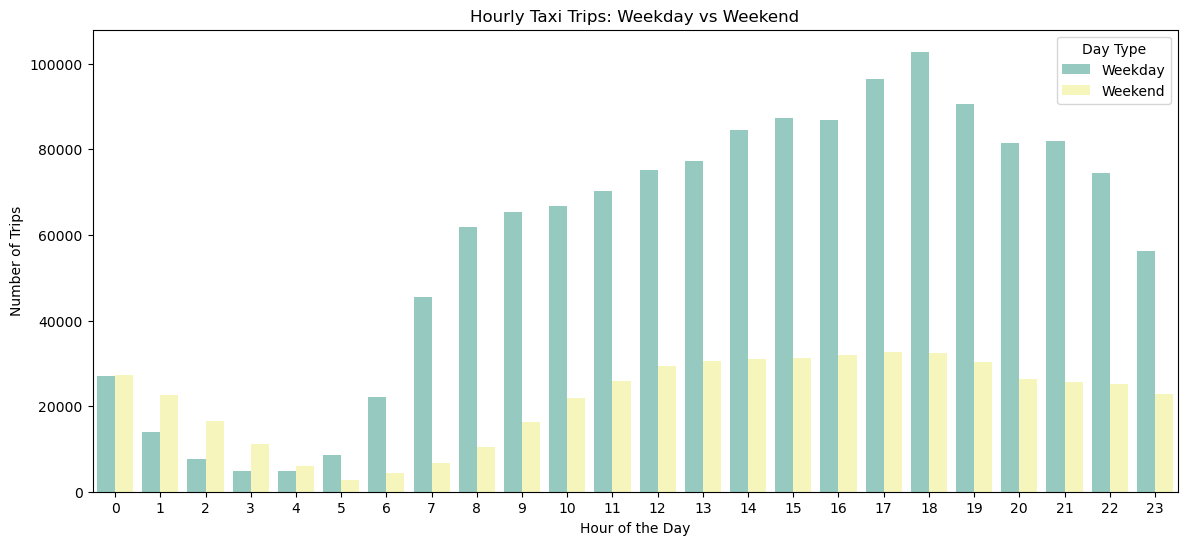

In [151]:
# Compare traffic trends for the week days and weekends

df['day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
hour_daytype = df.groupby(['hour', 'day_type']).size().reset_index(name='num_trips')
plt.figure(figsize=(14, 6))
sns.barplot(x='hour', y='num_trips', hue='day_type', data=hour_daytype, palette='Set3')
plt.title("Hourly Taxi Trips: Weekday vs Weekend")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.legend(title='Day Type')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

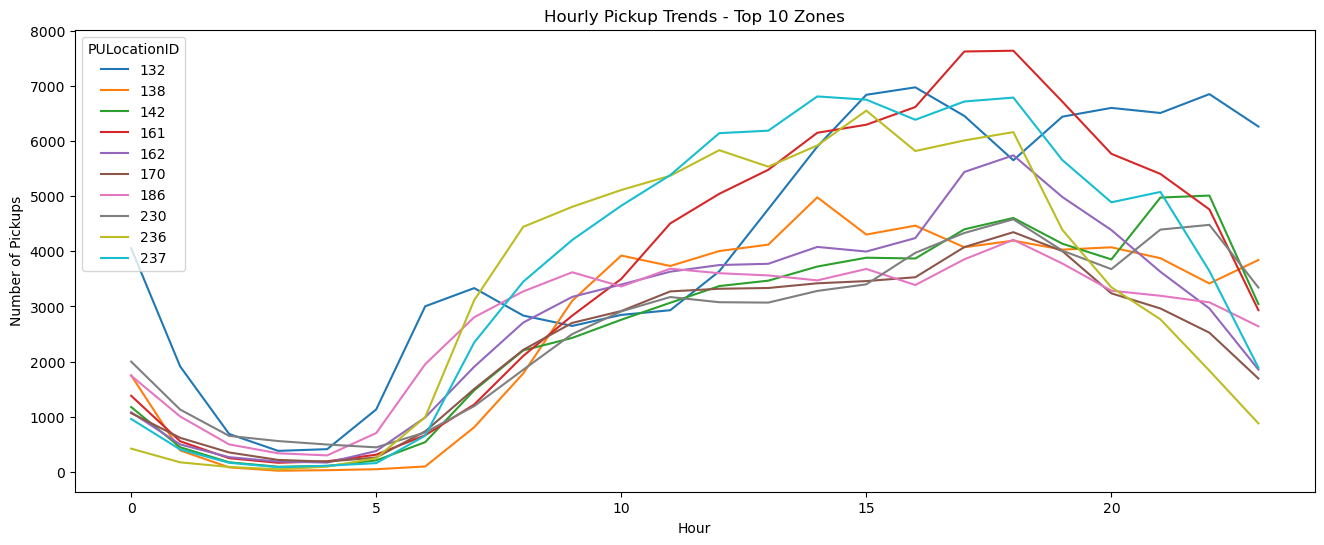

In [153]:
# Find top 10 pickup and dropoff zones

top_pu_zones = df['PULocationID'].value_counts().head(10).index
#Find top 10 dropoff zones
top_do_zones = df['DOLocationID'].value_counts().head(10).index

pickup_df = df[df['PULocationID'].isin(top_pu_zones)]
dropoff_df = df[df['DOLocationID'].isin(top_do_zones)]

# Group pickup and dropoff data by hour and location
pickup_trends = pickup_df.groupby(['hour', 'PULocationID']).size().reset_index(name='pickup_count')
dropoff_trends = dropoff_df.groupby(['hour', 'DOLocationID']).size().reset_index(name='dropoff_count')

#Pickup trend
plt.figure(figsize=(16, 6))
sns.lineplot(data=pickup_trends, x='hour', y='pickup_count', hue='PULocationID', palette='tab10')
plt.title("Hourly Pickup Trends - Top 10 Zones")
plt.xlabel("Hour")
plt.ylabel("Number of Pickups")
plt.legend(title='PULocationID')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [155]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

# Combine into a single DataFrame
zone_stats = pd.DataFrame({
    'pickup_count': pickup_counts,
    'dropoff_count': dropoff_counts
}).fillna(0)  # Fill missing values with 0

# Calculate pickup/dropoff ratio
zone_stats['pickup_dropoff_ratio'] = zone_stats['pickup_count'] / (zone_stats['dropoff_count'] + 1)  # +1 to avoid division by zero

# Sort and get top 10 and bottom 10
top_10 = zone_stats.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10 = zone_stats.sort_values(by='pickup_dropoff_ratio').head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top_10)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10)



Top 10 Pickup/Dropoff Ratios:
     pickup_count  dropoff_count  pickup_dropoff_ratio
70         8662.0         1166.0              7.422451
132       99043.0        23940.0              4.136962
138       65134.0        24778.0              2.628597
186       65007.0        41584.0              1.563232
114       25317.0        18329.0              1.381178
43        31465.0        23307.0              1.349966
249       42719.0        31804.0              1.343154
162       67204.0        53512.0              1.255844
100       31402.0        26455.0              1.186952
142       62999.0        53359.0              1.180641

Bottom 10 Pickup/Dropoff Ratios:
     pickup_count  dropoff_count  pickup_dropoff_ratio
204           0.0            8.0              0.000000
115           0.0           20.0              0.000000
99            0.0            2.0              0.000000
111           0.0           16.0              0.000000
245           1.0           25.0              0.038462
1

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top Pickups during during (11pm to 5am)
   PULocationID                          zone  pickup_count
0            79                  East Village         16617
1           132                   JFK Airport         14837
2           249                  West Village         13312
3            48                  Clinton East         10945
4           148               Lower East Side         10405
5           114       Greenwich Village South          9278
6           230     Times Sq/Theatre District          8619
7           186  Penn Station/Madison Sq West          7220
8           164                 Midtown South          6610
9            68                  East Chelsea          6483


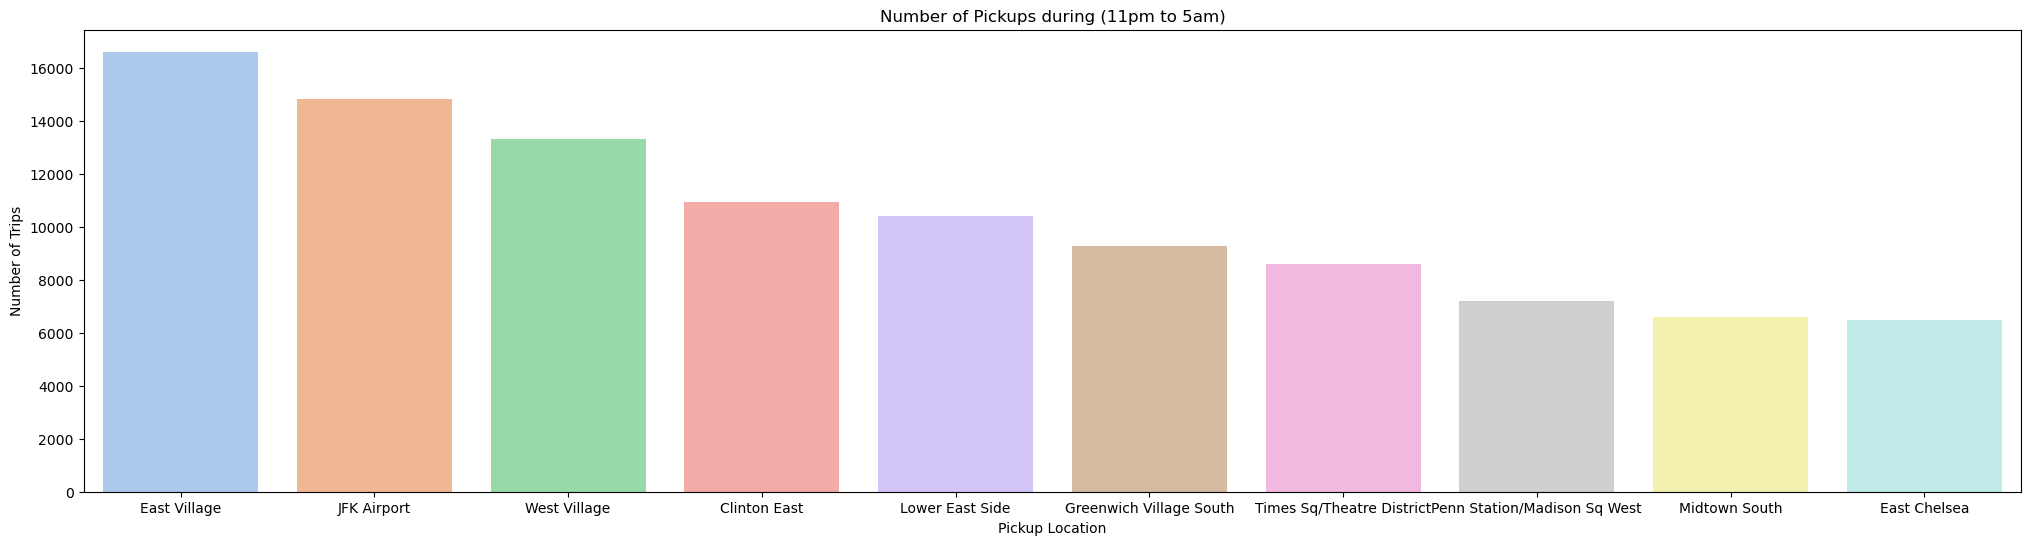

   DOLocationID                       zone  drop_count
0            79               East Village        8857
1            48               Clinton East        7611
2           170                Murray Hill        6525
3            68               East Chelsea        6078
4           107                   Gramercy        5966
5           141            Lenox Hill West        5609
6           263             Yorkville West        5440
7           249               West Village        5219
8           230  Times Sq/Theatre District        5022
9           148            Lower East Side        4696


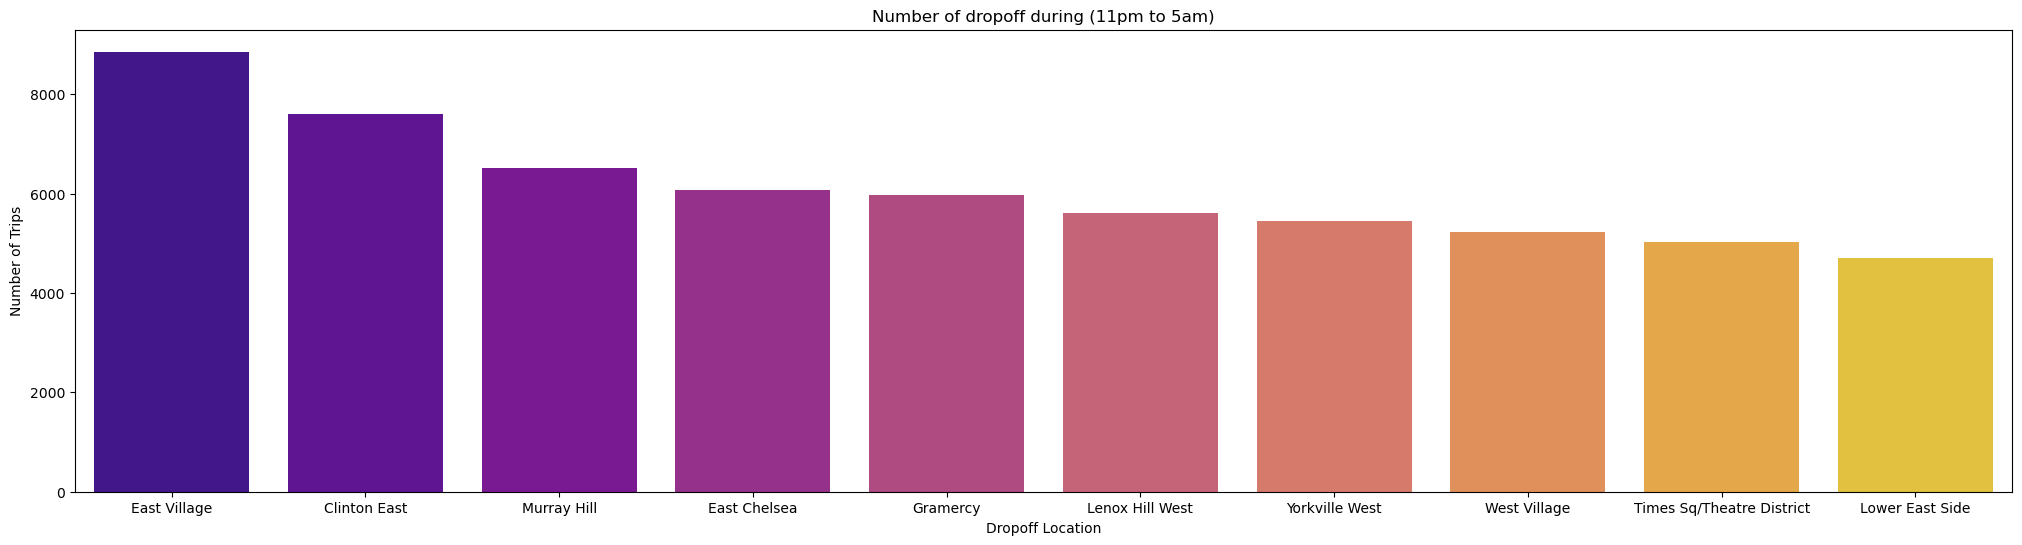

In [157]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = df[(df["hour"] == 23) | (df["hour"] <= 5)]

# Get top 10 pickup zone IDs by frequency
top_pickups = night_hours['PULocationID'].value_counts().head(10).reset_index()
top_pickups.columns = ['PULocationID', 'pickup_count']

# Merge with zone names
top_pickups = top_pickups.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Display result
print("Top Pickups during during (11pm to 5am)")
print(top_pickups[['PULocationID', 'zone', 'pickup_count']])


plt.figure(figsize=(25, 6))
sns.barplot(x=top_pickups.zone, y=top_pickups.pickup_count,palette="pastel")
plt.title("Number of Pickups during (11pm to 5am)")
plt.xlabel("Pickup Location")
plt.ylabel("Number of Trips")
plt.show()


      
# Get top 10 drop zone IDs by frequency
top_dropoff = night_hours['DOLocationID'].value_counts().head(10).reset_index()
top_dropoff.columns = ['DOLocationID', 'drop_count']

top_dropoff = top_dropoff.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')

# Display result
print(top_dropoff[['DOLocationID', 'zone', 'drop_count']])

plt.figure(figsize=(25, 6))
sns.barplot(x=top_dropoff.zone, y=top_dropoff.drop_count,palette="plasma")
plt.title("Number of dropoff during (11pm to 5am)")
plt.xlabel("Dropoff Location")
plt.ylabel("Number of Trips")
plt.show()



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

  time_of_the_day  Total_Revenue
0         daytime    47674359.83
1       nighttime     6675516.91


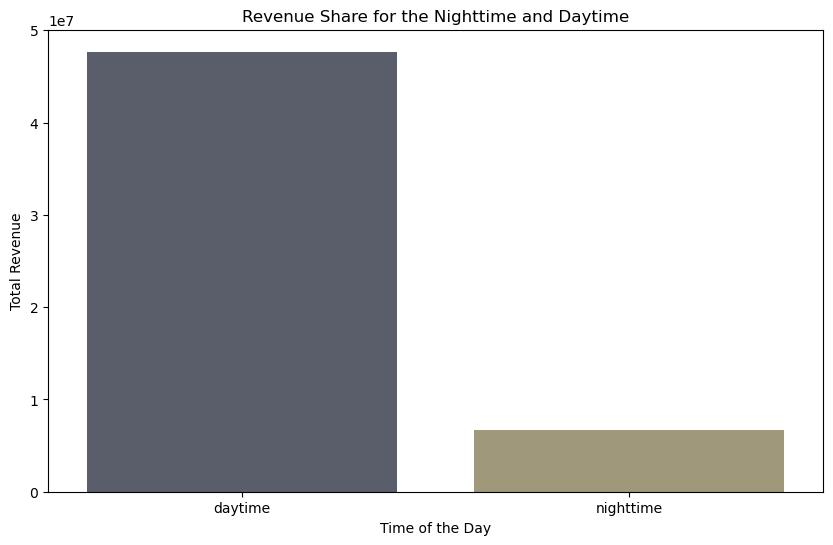

In [159]:
# Filter for night hours (11 PM to 5 AM)

df['time_of_the_day'] = df['hour'].apply(lambda x: 'nighttime' if x in [23,0,1,2,3,4,5] else 'daytime')
revenue_Share=df.groupby('time_of_the_day')['total_amount'].sum().reset_index()
revenue_Share.columns=['time_of_the_day', 'Total_Revenue']
print(revenue_Share)
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_Share,x='time_of_the_day', y='Total_Revenue',palette='cividis')
plt.title("Revenue Share for the Nighttime and Daytime")
plt.xlabel("Time of the Day")
plt.ylabel("Total Revenue")
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count  fare_per_mile_per_passenger
0                1                     9.818879
1                2                     5.940669
2                3                     3.931017
3                4                     3.873365
4                5                     1.595359
5                6                     1.454016


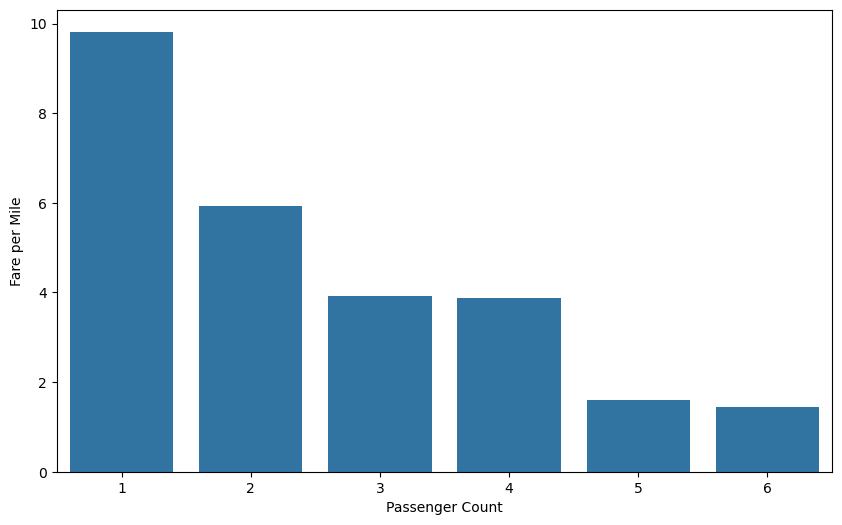

In [161]:
# Analyse the fare per mile per passenger for different passenger counts

df_filtered = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_amount'] / (df_filtered['trip_distance'] * df_filtered['passenger_count'])
revenue_Share=df_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
print(revenue_Share)
plt.figure(figsize=(10,6))
sns.barplot(data=revenue_Share,x='passenger_count',y='fare_per_mile_per_passenger')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile')
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

     weekday  fare_per_mile
0     Monday       9.825097
1    Tuesday      10.088279
2  Wednesday      10.161051
3   Thursday      10.681861
4     Friday      10.272000
5   Saturday       9.997775
6     Sunday      10.929097


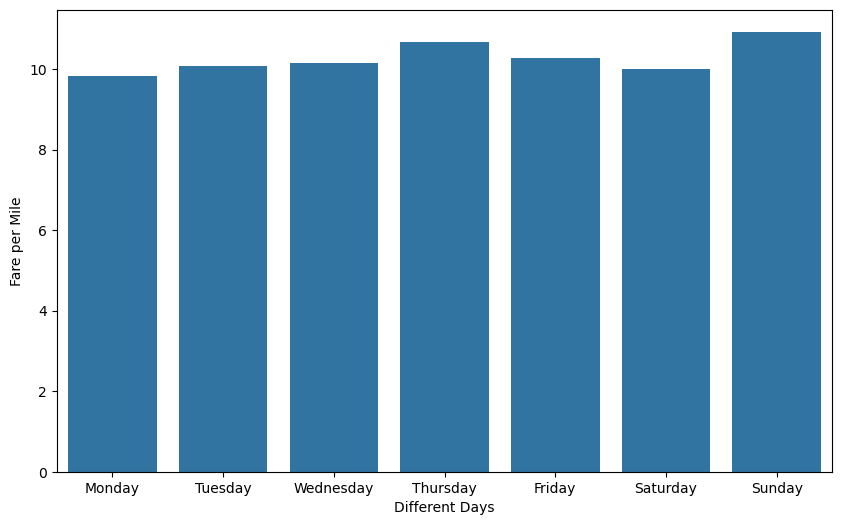

In [163]:
# Compare the average fare per mile for different days and for different times of the day

df_filtered['fare_per_mile']=df_filtered['fare_amount'] / (df_filtered['trip_distance'])
weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_fare_different_days=df_filtered.groupby('weekday')['fare_per_mile'].mean().loc[weekdays_order].reset_index()
print(avg_fare_different_days)
plt.figure(figsize=(10,6))
sns.barplot(data=avg_fare_different_days,x='weekday',y='fare_per_mile')
plt.xlabel('Different Days')
plt.ylabel('Fare per Mile')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

    VendorID  hour  fare_per_mile
0          1     0       6.739432
1          1     1       6.957800
2          1     2       7.075853
3          1     3       6.391965
4          1     4       7.615820
..       ...   ...            ...
66         6    19       5.648984
67         6    20       4.233599
68         6    21       3.503091
69         6    22       4.593337
70         6    23       3.318774

[71 rows x 3 columns]


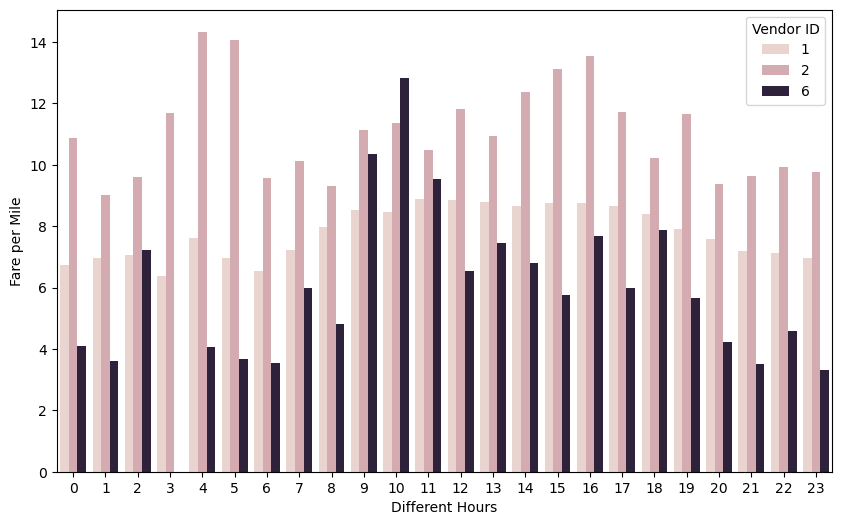

In [165]:
# Compare fare per mile for different vendors

vendor_id_hour=df_filtered.groupby(['VendorID','hour'])['fare_per_mile'].mean().reset_index()
print(vendor_id_hour)
plt.figure(figsize=(10,6))
sns.barplot(data=vendor_id_hour,x='hour',y='fare_per_mile',hue='VendorID')
plt.xlabel('Different Hours')
plt.ylabel('Fare per Mile')
plt.legend(title="Vendor ID")
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


   VendorID distance_tier  fare_per_mile
0         1     0-2 miles       9.932503
3         2     0-2 miles      15.627197
6         6     0-2 miles      21.671230
1         1     2-5 miles       6.386500
4         2     2-5 miles       6.429892
7         6     2-5 miles       8.564758
2         1      >5 miles       4.426301
5         2      >5 miles       4.385236
8         6      >5 miles       4.379541


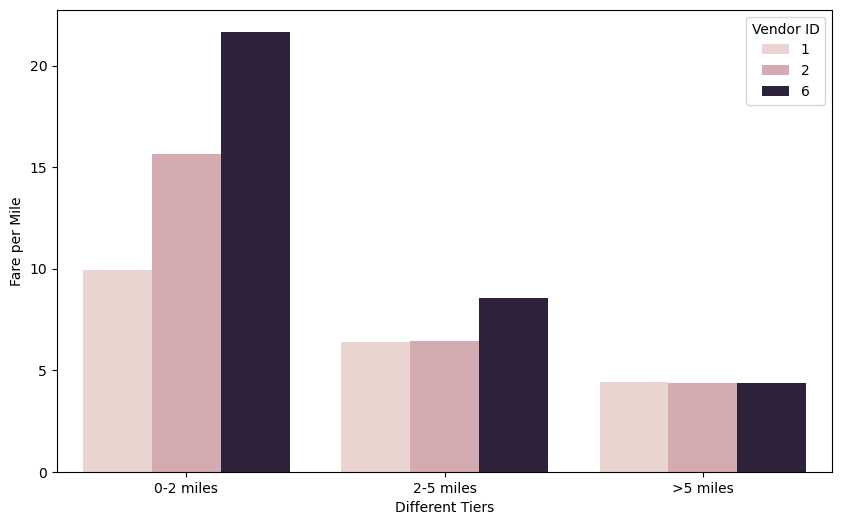

In [167]:
# Defining distance tiers

def distance_tier(dist):
    if dist <= 2:
        return '0-2 miles'
    elif dist <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(distance_tier)
fare_analysis = df_filtered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
fare_analysis = fare_analysis.sort_values(by=['distance_tier', 'VendorID'])
print(fare_analysis)
plt.figure(figsize=(10,6))
sns.barplot(data=fare_analysis,x='distance_tier',y='fare_per_mile',hue='VendorID')
plt.xlabel('Different Tiers')
plt.ylabel('Fare per Mile')
plt.legend(title="Vendor ID")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

  distance_tier  tip_percentage
0     0-2 miles             inf
1     2-5 miles             inf
2      >5 miles             inf


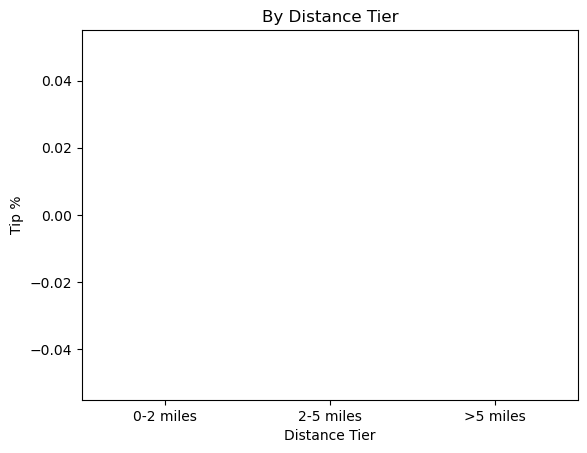

   passenger_count  tip_percentage
0                1             inf
1                2             inf
2                3             inf
3                4       17.155574
4                5       29.085362
5                6       20.509808


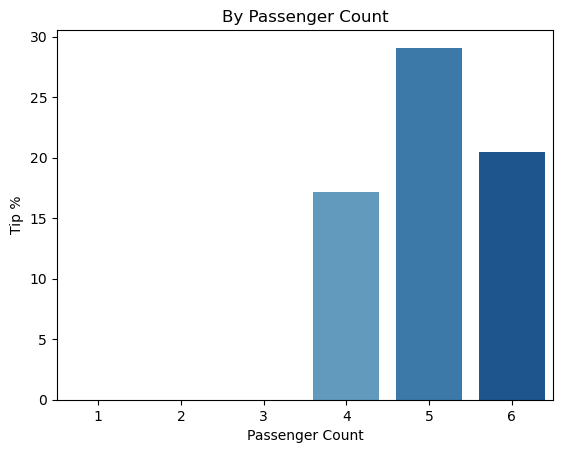

    hour  tip_percentage
0      0       20.049137
1      1             inf
2      2             inf
3      3       19.692054
4      4       17.231392
5      5       17.241373
6      6       18.034707
7      7       19.458531
8      8       19.806922
9      9             inf
10    10       19.259534
11    11       18.964945
12    12             inf
13    13       18.942617
14    14       18.838365
15    15       20.608912
16    16             inf
17    17       21.341548
18    18             inf
19    19       21.797580
20    20       21.147645
21    21       21.315326
22    22             inf
23    23             inf


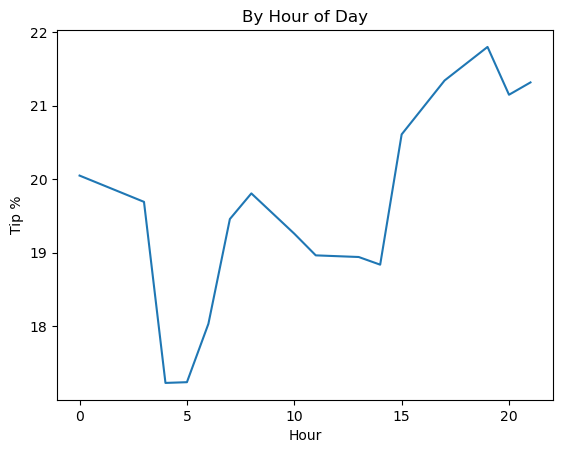

In [169]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_filtered['tip_percentage'] = (df_filtered['tip_amount']/df_filtered['fare_amount'])*100

#based on trip distances
tip_by_distance = df_filtered.groupby('distance_tier')['tip_percentage'].mean().reset_index()
print(tip_by_distance)
sns.barplot(data=tip_by_distance, x='distance_tier', y='tip_percentage', palette='coolwarm')
plt.title("By Distance Tier")
plt.ylabel("Tip %")
plt.xlabel("Distance Tier")

plt.show()


#based on passenger counts
tip_by_customer=df_filtered.groupby('passenger_count')['tip_percentage'].mean().reset_index()
print(tip_by_customer)

sns.barplot(data=tip_by_customer, x='passenger_count', y='tip_percentage', palette='Blues')
plt.title("By Passenger Count")
plt.ylabel("Tip %")
plt.xlabel("Passenger Count")

plt.show()

#based on hour 
tip_by_hour = df_filtered.groupby('hour')['tip_percentage'].mean().reset_index()
print(tip_by_hour)

sns.lineplot(data=tip_by_hour, x='hour', y='tip_percentage')
plt.title("By Hour of Day")
plt.ylabel("Tip %")
plt.xlabel("Hour")

plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [171]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tips=df_filtered[df_filtered['tip_percentage'] < 10]
high_tips=df_filtered[df_filtered['tip_percentage'] > 25]

print("Average values for low tip trips (<10%)")
print(low_tips[['trip_distance', 'fare_amount', 'passenger_count', 'hour']].mean())

print("\nAverage values for high tip trips (>25%)")
print(high_tips[['trip_distance', 'fare_amount', 'passenger_count', 'hour']].mean())

Average values for low tip trips (<10%)
trip_distance       3.916690
fare_amount        20.254836
passenger_count     1.415709
hour               13.922602
dtype: float64

Average values for high tip trips (>25%)
trip_distance       2.307957
fare_amount        14.424362
passenger_count     1.358750
hour               14.589716
dtype: float64


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

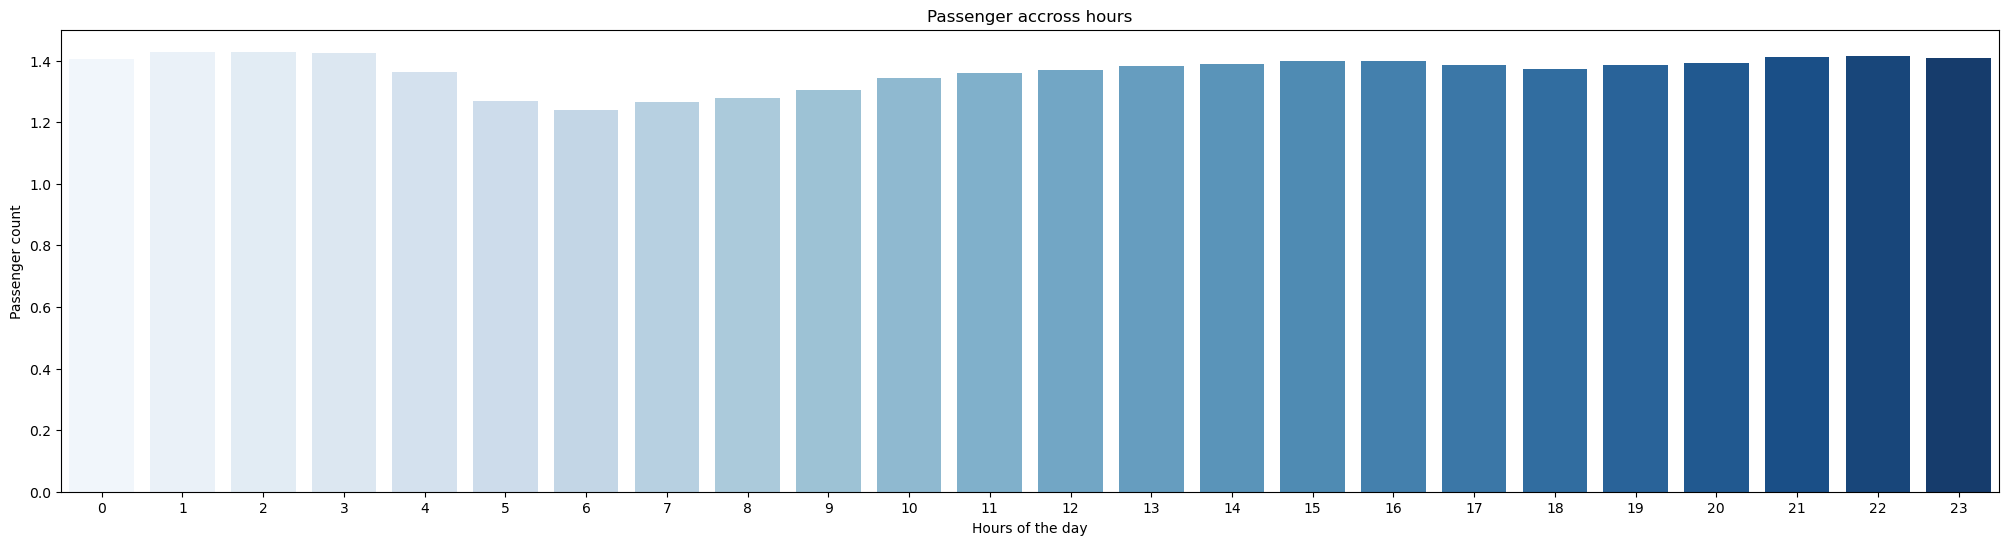

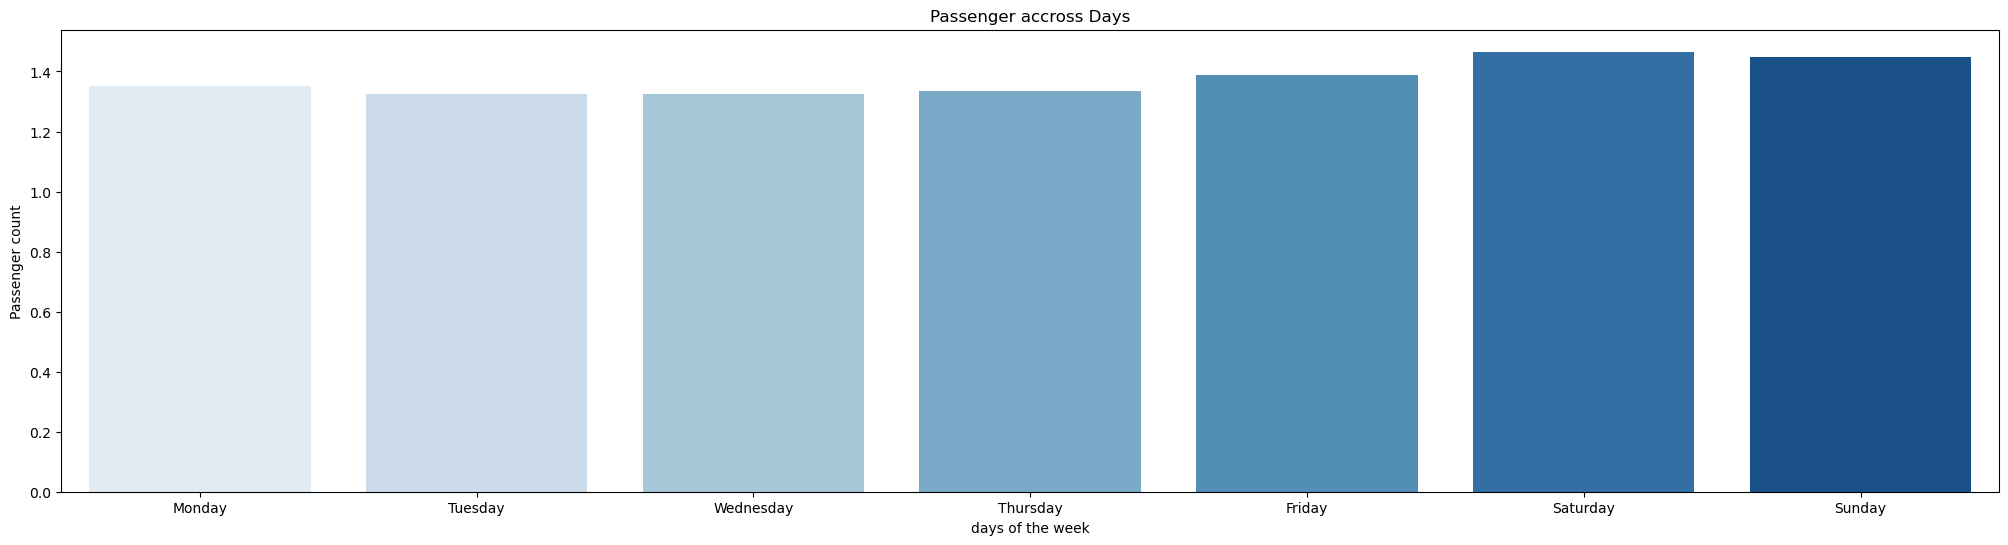

In [173]:
# See how passenger count varies across hours and days


passenger_count_hour=df_filtered.groupby('hour')['passenger_count'].mean().reset_index()
plt.figure(figsize=(25,6))
sns.barplot(data=passenger_count_hour,x='hour',y='passenger_count',palette='Blues')
plt.xlabel('Hours of the day')
plt.ylabel('Passenger count')
plt.title("Passenger accross hours")
plt.show()

#passenger count accross days
passenger_count_days=df_filtered.groupby('weekday')['passenger_count'].mean().loc[weekdays_order].reset_index()
plt.figure(figsize=(25,6))
sns.barplot(data=passenger_count_days,x='weekday',y='passenger_count',palette='Blues')
plt.xlabel('days of the week')
plt.ylabel('Passenger count')
plt.title("Passenger accross Days")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

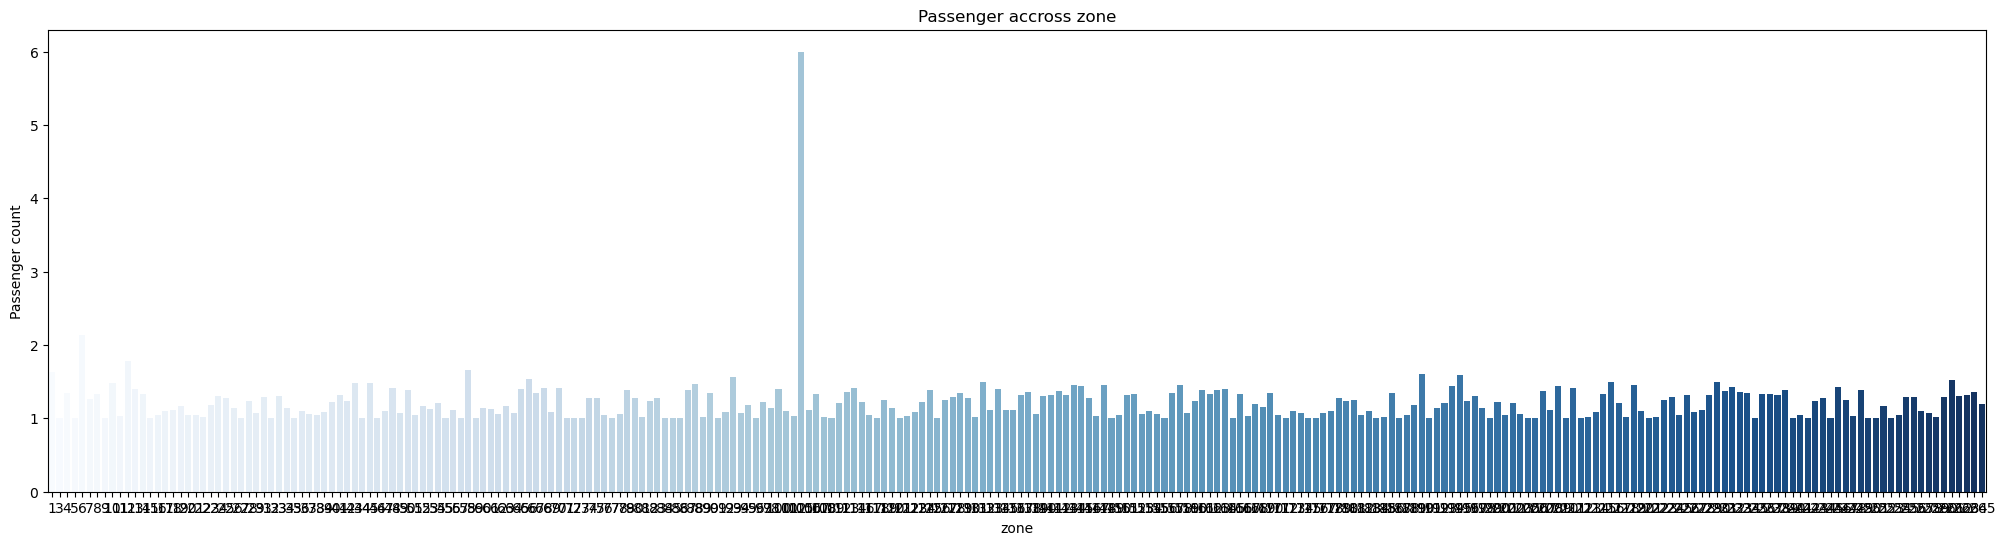

In [175]:
# How does passenger count vary across zones

passenger_count_zone=df_filtered.groupby('PULocationID')['passenger_count'].mean().reset_index()
plt.figure(figsize=(25,6))
sns.barplot(data=passenger_count_zone,x='PULocationID',y='passenger_count',palette='Blues')
plt.xlabel('zone')
plt.ylabel('Passenger count')
plt.title("Passenger accross zone")
plt.show()

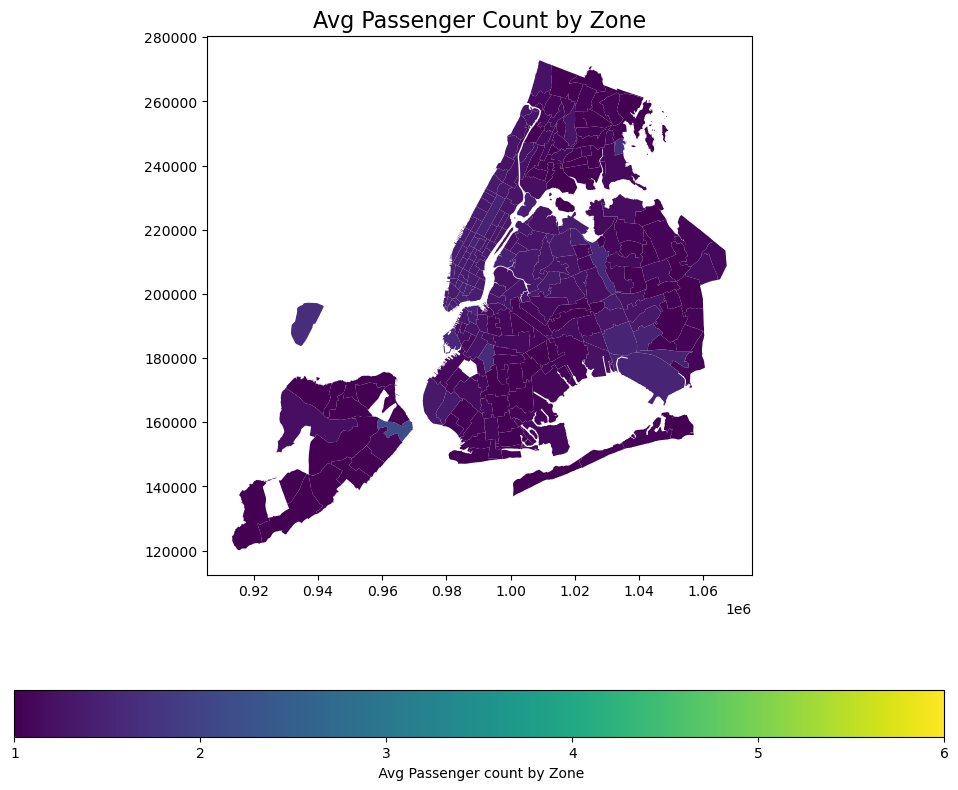

In [177]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones.head()
zones=pd.merge(left=passenger_count_zone,right=zones, how='left', left_on='PULocationID', right_on='LocationID')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones = gpd.GeoDataFrame(zones, geometry='geometry')
zones.plot(
    column='passenger_count',                     
    cmap='viridis',                           
    linewidth=0.8,
    ax=ax,                        
    legend=True,
    legend_kwds={'label': " Avg Passenger count by Zone", 'orientation': "horizontal"}
)
ax.set_title("Avg Passenger Count by Zone", fontsize=16)
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [179]:
# How often is each surcharge applied?

pickup_surcharge = df.groupby(['PULocationID', 'congestion_surcharge']).size().reset_index(name='count')
pickup_surcharge = pickup_surcharge.sort_values(by='count', ascending=False)
print(pickup_surcharge.head(10))

drop_surcharge = df.groupby(['DOLocationID', 'congestion_surcharge']).size().reset_index(name='count')
drop_surcharge = drop_surcharge.sort_values(by='count', ascending=False)
print(drop_surcharge.head(10))

hour_surcharge = df.groupby(['hour', 'congestion_surcharge']).size().reset_index(name='count')
hour_surcharge = hour_surcharge.sort_values(by='count', ascending=False)
print(hour_surcharge.head(10))

     PULocationID  congestion_surcharge  count
525           237                   2.5  88702
354           161                   2.5  86673
522           236                   2.5  78966
357           162                   2.5  66214
410           186                   2.5  63988
305           142                   2.5  62201
505           230                   2.5  61394
377           170                   2.5  55022
360           163                   2.5  54139
531           239                   2.5  52742
     DOLocationID  congestion_surcharge  count
642           236                   2.5  82918
645           237                   2.5  79533
435           161                   2.5  73905
624           230                   2.5  58000
462           170                   2.5  55397
651           239                   2.5  53173
438           162                   2.5  52895
380           142                   2.5  52747
377           141                   2.5  49702
186          

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [181]:
"""Prioritize dispatch during peak hours (6–8 PM on weekdays) to high-demand zones like Midtown, JFK, and LaGuardia.Reroute or reduce supply during low-demand hours (3–5 AM) and redistribute cabs toward zones with nightlife like East/West Village.
Avoid slow routes by analyzing and avoiding origin-destination pairs with low average speeds during rush hours.Weekend dispatching should be more spread out and balanced, with added focus on nightlife zones (East Village, West Village)"""


'Prioritize dispatch during peak hours (6–8 PM on weekdays) to high-demand zones like Midtown, JFK, and LaGuardia.Reroute or reduce supply during low-demand hours (3–5 AM) and redistribute cabs toward zones with nightlife like East/West Village.\nAvoid slow routes by analyzing and avoiding origin-destination pairs with low average speeds during rush hours.Weekend dispatching should be more spread out and balanced, with added focus on nightlife zones (East Village, West Village)'

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [183]:
"""Based on the analysis, it is evident that zones such as JFK Airport, west village, and Times Square consistently rank among the top locations for pickups. During night hours (11 PM–5 AM), neighborhoods like East Village, Clinton East, and Murray Hill experience a notable increase in activity, highlighting late-night travel demand in nightlife and residential areas. Zone-wise heatmaps further confirm a strong clustering of trip demand in specific geographic regions.
To optimize cab distribution, strategic positioning should be adopted based on time and day trends. During daytime hours (6 AM–4 PM), cabs should be concentrated in high-traffic commercial and commuter hubs such as Times Square, and JFK Airport to capture office-hour and airport-related traffic. For late-night operations (11 PM–3 AM), a shift in focus toward nightlife-centric areas like East Village, West Village, and Clinton East is recommended to meet high drop-off demand from restaurants, bars, and clubs.
On weekends, where trip volumes are more evenly spread throughout the day, cab distribution should be balanced across popular entertainment districts and tourist attractions to ensure service availability. Additionally, data indicates strong round-trip activity, particularly around airports, where the same pickup and drop-off zones are common. This suggests that cabs can be strategically queued at airports to take advantage of steady inbound and outbound traffic, enabling faster turnaround times and maximizing earnings."""


'Based on the analysis, it is evident that zones such as JFK Airport, west village, and Times Square consistently rank among the top locations for pickups. During night hours (11 PM–5 AM), neighborhoods like East Village, Clinton East, and Murray Hill experience a notable increase in activity, highlighting late-night travel demand in nightlife and residential areas. Zone-wise heatmaps further confirm a strong clustering of trip demand in specific geographic regions.\nTo optimize cab distribution, strategic positioning should be adopted based on time and day trends. During daytime hours (6 AM–4 PM), cabs should be concentrated in high-traffic commercial and commuter hubs such as Times Square, and JFK Airport to capture office-hour and airport-related traffic. For late-night operations (11 PM–3 AM), a shift in focus toward nightlife-centric areas like East Village, West Village, and Clinton East is recommended to meet high drop-off demand from restaurants, bars, and clubs.\nOn weekends, 

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [193]:
"""From the analysis, it's evident that fare per mile decreases as trip distance increases, with short trips (0–2 miles) being the most frequent and showing the highest fare-per-mile. This indicates a clear opportunity for flat-rate pricing on short-distance rides to simplify fares and attract more passengers.
Additionally, Vendor 6 consistently charges the highest fare per mile, while Vendor 1 offers more stable pricing, highlighting potential pricing competitiveness among vendors.
Tips tend to be higher for solo-passenger, short trips, especially during evening rush hours (4–6 PM). While daytime contributes more to total revenue, nighttime trips (3–5 AM) have a higher fare per mile, suggesting premium pricing opportunities in those hours.
Based on these insights, the following pricing strategy adjustments are recommended:
•	Introduce flat fare tiers for trips under 2 miles to encourage high-frequency short rides.
•	Implement surge pricing in high-demand zones such as JFK, Midtown, and Times Square during peak hours, supported by zone-level trip density data.
•	Adjust pricing by time of day, capitalizing on early morning (3–5 AM) and evening peak periods for enhanced profitability."""

"From the analysis, it's evident that fare per mile decreases as trip distance increases, with short trips (0–2 miles) being the most frequent and showing the highest fare-per-mile. This indicates a clear opportunity for flat-rate pricing on short-distance rides to simplify fares and attract more passengers.\nAdditionally, Vendor 6 consistently charges the highest fare per mile, while Vendor 1 offers more stable pricing, highlighting potential pricing competitiveness among vendors.\nTips tend to be higher for solo-passenger, short trips, especially during evening rush hours (4–6 PM). While daytime contributes more to total revenue, nighttime trips (3–5 AM) have a higher fare per mile, suggesting premium pricing opportunities in those hours.\nBased on these insights, the following pricing strategy adjustments are recommended:\n•\tIntroduce flat fare tiers for trips under 2 miles to encourage high-frequency short rides.\n•\tImplement surge pricing in high-demand zones such as JFK, Midtow